# Principal Component Analysis for Dimensionality Reduction

## Introduction

Working with high-dimensional data presents several challenges:
- **Analysis complexity**: Difficult to analyze and interpret
- **Visualization impossibility**: Cannot visualize beyond 3D
- **Storage costs**: High-dimensional vectors require significant memory
- **Curse of dimensionality**: Performance degradation in high dimensions

However, high-dimensional data often exhibits exploitable properties:
- **Overcompleteness**: Many dimensions are redundant
- **Correlation**: Dimensions are often correlated, revealing intrinsic lower-dimensional structure

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that exploits these properties to create compact data representations while preserving essential information.

---

## Mathematical Foundation

### Problem Setup

Given a dataset $\mathbf{X} \in \mathbb{R}^{N \times D}$ with:
- $N$ data points (observations)
- $D$ dimensions (features)
- Each row $\mathbf{x}_i \in \mathbb{R}^D$ represents one data point

Our goal is to find a lower-dimensional representation $\mathbf{Z} \in \mathbb{R}^{N \times K}$ where $K < D$.

### Data Preprocessing

First, we center the data by subtracting the mean:

$$\mathbf{X}_{centered} = \mathbf{X} - \mathbf{1}\boldsymbol{\mu}^T$$

where $\boldsymbol{\mu} = \frac{1}{N}\sum_{i=1}^{N}\mathbf{x}_i$ is the sample mean.

---

## Covariance Matrix and Eigendecomposition

### Sample Covariance Matrix

The sample covariance matrix captures the relationships between features:

$$\mathbf{S} = \frac{1}{N-1}\mathbf{X}_{centered}^T \mathbf{X}_{centered} \in \mathbb{R}^{D \times D}$$

Element $(i,j)$ of $\mathbf{S}$ represents the covariance between features $i$ and $j$:

$$S_{ij} = \frac{1}{N-1}\sum_{n=1}^{N}(x_{ni} - \mu_i)(x_{nj} - \mu_j)$$

### Eigendecomposition

Since $\mathbf{S}$ is symmetric and positive semi-definite, we can perform eigendecomposition:

$$\mathbf{S} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^T$$

where:
- $\mathbf{U} = [\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_D]$ contains orthonormal eigenvectors
- $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_D)$ with eigenvalues $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_D \geq 0$

---

## Principal Components

### Definition

The **principal components** are the eigenvectors of the covariance matrix, ordered by their corresponding eigenvalues:

- **First Principal Component**: $\mathbf{u}_1$ (direction of maximum variance)
- **Second Principal Component**: $\mathbf{u}_2$ (direction of second maximum variance, orthogonal to $\mathbf{u}_1$)
- And so on...

### Variance Explanation

The eigenvalue $\lambda_i$ represents the variance captured by the $i$-th principal component:

$$\text{Var}(\mathbf{X}_{centered}\mathbf{u}_i) = \lambda_i$$

![image.png](attachment:image.png)
Fig.1 Illustration: dimensionality reduction. (a) The original dataset does not vary much along the x2 direction. (b) The data from (a) can be represented using the x1 -coordinate alone with nearly no loss.

### Cumulative Explained Variance

The proportion of total variance explained by the first $K$ components:

$$\text{Explained Variance Ratio} = \frac{\sum_{i=1}^{K}\lambda_i}{\sum_{i=1}^{D}\lambda_i}$$

---

## PCA Transformation

### Dimensionality Reduction

To reduce dimensionality from $D$ to $K$, we:

1. Select the first $K$ principal components: $\mathbf{U}_K = [\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_K]$

2. Project the centered data onto the principal subspace:

$$\mathbf{Z} = \mathbf{X}_{centered}\mathbf{U}_K \in \mathbb{R}^{N \times K}$$

### Reconstruction

We can reconstruct the original data (approximately) using:

$$\mathbf{X}_{reconstructed} = \mathbf{Z}\mathbf{U}_K^T + \mathbf{1}\boldsymbol{\mu}^T$$

### Reconstruction Error

The reconstruction error measures information loss:

$$\text{Reconstruction Error} = \|\mathbf{X} - \mathbf{X}_{reconstructed}\|_F^2 = \sum_{i=K+1}^{D}\lambda_i$$

where $\|\cdot\|_F$ is the Frobenius norm.

---

## Optimization Perspective

### Maximum Variance Formulation

PCA can be derived as finding the direction that maximizes variance:

$$\mathbf{u}_1 = \arg\max_{\|\mathbf{u}\|=1} \mathbf{u}^T\mathbf{S}\mathbf{u}$$

This is solved using Lagrange multipliers:

$$\mathcal{L}(\mathbf{u}, \lambda) = \mathbf{u}^T\mathbf{S}\mathbf{u} - \lambda(\mathbf{u}^T\mathbf{u} - 1)$$

Taking derivatives and setting to zero:

$$\frac{\partial\mathcal{L}}{\partial\mathbf{u}} = 2\mathbf{S}\mathbf{u} - 2\lambda\mathbf{u} = 0$$

This gives us the eigenvalue equation: $\mathbf{S}\mathbf{u} = \lambda\mathbf{u}$

### Minimum Reconstruction Error Formulation

Alternatively, PCA minimizes reconstruction error:

$$\min_{\mathbf{U}_K} \|\mathbf{X}_{centered} - \mathbf{X}_{centered}\mathbf{U}_K\mathbf{U}_K^T\|_F^2$$

---

## Singular Value Decomposition (SVD) Approach

### SVD of Data Matrix

For the centered data matrix $\mathbf{X}_{centered}$, we can compute SVD:

$$\mathbf{X}_{centered} = \mathbf{V}\boldsymbol{\Sigma}\mathbf{U}^T$$

where:
- $\mathbf{V} \in \mathbb{R}^{N \times N}$: left singular vectors
- $\boldsymbol{\Sigma} \in \mathbb{R}^{N \times D}$: diagonal matrix of singular values
- $\mathbf{U} \in \mathbb{R}^{D \times D}$: right singular vectors (these are our principal components!)

### Relationship to Eigendecomposition

The relationship between SVD and eigendecomposition is:

$$\mathbf{S} = \frac{1}{N-1}\mathbf{X}_{centered}^T\mathbf{X}_{centered} = \frac{1}{N-1}\mathbf{U}\boldsymbol{\Sigma}^2\mathbf{U}^T$$

Therefore: $\boldsymbol{\Lambda} = \frac{1}{N-1}\boldsymbol{\Sigma}^2$

### Computational Advantage

SVD is often more numerically stable and efficient than computing the covariance matrix explicitly, especially when $N < D$.

---

## Choosing the Number of Components

### Scree Plot

Plot eigenvalues in descending order. Look for an "elbow" where the curve flattens.

### Cumulative Explained Variance

Choose $K$ such that a desired percentage (e.g., 95%) of variance is retained:

$$\frac{\sum_{i=1}^{K}\lambda_i}{\sum_{i=1}^{D}\lambda_i} \geq 0.95$$

### Kaiser Criterion

Retain components with eigenvalues greater than the average: $\lambda_i > \frac{1}{D}\sum_{j=1}^{D}\lambda_j$

For standardized data, this means $\lambda_i > 1$.

---

## Practical Implementation

```python
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample implementation
class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        # Compute covariance matrix
        cov_matrix = np.cov(X_centered.T)
        
        # Eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort by eigenvalues (descending)
        idx = np.argsort(eigenvalues)[::-1]
        self.eigenvalues_ = eigenvalues[idx]
        self.components_ = eigenvectors[:, idx].T
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean_
        return X_centered @ self.components_[:self.n_components].T
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)
```

---

## Applications and Use Cases

### 1. Data Visualization
- Reduce high-dimensional data to 2D or 3D for plotting
- Preserve as much variance as possible in lower dimensions

### 2. Data Compression
- Store data using fewer dimensions
- Trade-off between compression ratio and information loss

### 3. Noise Reduction
- Remove components with small eigenvalues (likely noise)
- Reconstruct "denoised" data using top components

### 4. Feature Engineering
- Create new features (principal components) that are uncorrelated
- Use as input to other machine learning algorithms

### 5. Anomaly Detection
- Large reconstruction errors may indicate outliers
- Monitor data that deviates from normal patterns

---

## Limitations and Considerations

### Linear Assumption
- PCA finds linear combinations of original features
- May miss nonlinear structures in data

### Mean-Centered Data
- PCA assumes data should be centered around the origin
- May need to standardize features with different scales

### Interpretability
- Principal components are linear combinations of original features
- May be difficult to interpret in terms of original variables

### Outlier Sensitivity
- Outliers can significantly affect covariance matrix
- Consider robust PCA variants for outlier-prone data

---

## Advanced Topics

### Kernel PCA
For nonlinear dimensionality reduction:

$$\mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j)$$

where $k(\cdot, \cdot)$ is a kernel function (e.g., RBF, polynomial).

### Probabilistic PCA
Model data generation process:

$$\mathbf{x} = \mathbf{W}\mathbf{z} + \boldsymbol{\mu} + \boldsymbol{\epsilon}$$

where $\mathbf{z} \sim \mathcal{N}(0, \mathbf{I})$ and $\boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2\mathbf{I})$.

### Incremental PCA
For streaming data or when dataset doesn't fit in memory:
- Update principal components incrementally
- Maintain running estimates of mean and covariance

---

## Summary

Principal Component Analysis is a fundamental technique for dimensionality reduction that:

1. **Identifies directions of maximum variance** in high-dimensional data
2. **Projects data onto lower-dimensional subspace** while preserving information
3. **Provides optimal linear compression** in terms of reconstruction error
4. **Enables visualization and analysis** of high-dimensional datasets

The mathematical foundation relies on eigendecomposition of the covariance matrix, connecting linear algebra concepts with practical data analysis needs.

![image.png](attachment:image.png)

Fig.2 Graphical illustration of PCA. In PCA, we find a compressed version z of original data x. The compressed data can be reconstructed into x̃, which lives in the original data space, but has an intrinsic lower-dimensional a- representation than x.
# Principal Component Analysis for Dimensionality Reduction

## 10.1 Problem Setting

In PCA, we are interested in finding projections $\tilde{\mathbf{x}}_n$ of data points $\mathbf{x}_n$ that are as similar to the original data points as possible, but which have a significantly lower intrinsic dimensionality.

### Dataset and Assumptions

We consider an i.i.d. dataset $\mathcal{X} = \{\mathbf{x}_1, \ldots, \mathbf{x}_N\}$ where $\mathbf{x}_n \in \mathbb{R}^D$ with mean $\mathbf{0}$ that possesses the **data covariance matrix**:

$\mathbf{S} = \frac{1}{N}\sum_{n=1}^{N}\mathbf{x}_n\mathbf{x}_n^T \in \mathbb{R}^{D \times D}$

### Low-Dimensional Representation

We assume there exists a low-dimensional **compressed representation** (code):

$\mathbf{z}_n = \mathbf{B}^T\mathbf{x}_n \in \mathbb{R}^M$

where we define the **projection matrix**:

$\mathbf{B} := [\mathbf{b}_1, \ldots, \mathbf{b}_M] \in \mathbb{R}^{D \times M}$

We assume that the columns of $\mathbf{B}$ are **orthonormal** so that:
- $\mathbf{b}_i^T\mathbf{b}_j = 0$ if and only if $i \neq j$ (orthogonal)
- $\mathbf{b}_i^T\mathbf{b}_i = 1$ (unit length)

### Subspace Projection

We seek an $M$-dimensional subspace $\mathcal{U} \subseteq \mathbb{R}^D$ with $\dim(\mathcal{U}) = M < D$ onto which we project the data. The columns $\mathbf{b}_1, \ldots, \mathbf{b}_M$ of $\mathbf{B}$ form a basis of the $M$-dimensional subspace in which the projected data live.

We denote:
- **Projected data**: $\tilde{\mathbf{x}}_n \in \mathcal{U}$
- **Coordinates**: $\mathbf{z}_n$ (with respect to basis vectors $\mathbf{b}_1, \ldots, \mathbf{b}_M$ of $\mathcal{U}$)

Our aim is to find projections $\tilde{\mathbf{x}}_n \in \mathbb{R}^D$ (or equivalently the codes $\mathbf{z}_n$ and basis vectors $\mathbf{b}_1, \ldots, \mathbf{b}_M$) such that:

$\tilde{\mathbf{x}} = \mathbf{B}\mathbf{B}^T\mathbf{x} \in \mathbb{R}^D$

so that they are as similar to the original data $\mathbf{x}_n$ and minimize the loss due to compression.

---

## Example 1: Coordinate Representation/Code

Consider $\mathbb{R}^2$ with the canonical basis $\mathbf{e}_1 = [1, 0]^T$, $\mathbf{e}_2 = [0, 1]^T$.

We know that $\mathbf{x} \in \mathbb{R}^2$ can be represented as a linear combination of these basis vectors:

$\begin{bmatrix} 5 \\ 3 \end{bmatrix} = 5\mathbf{e}_1 + 3\mathbf{e}_2$

However, when we consider vectors of the form:

$\tilde{\mathbf{x}} = \begin{bmatrix} 0 \\ z \end{bmatrix} \in \mathbb{R}^2, \quad z \in \mathbb{R}$

they can always be written as $0\mathbf{e}_1 + z\mathbf{e}_2$.

To represent these vectors, it is sufficient to remember/store the coordinate/code $z$ of $\tilde{\mathbf{x}}$ with respect to the $\mathbf{e}_2$ vector.

More precisely, the set of $\tilde{\mathbf{x}}$ vectors forms a vector subspace $\mathcal{U}$ with $\dim(\mathcal{U}) = 1$ because $\mathcal{U} = \text{span}[\mathbf{e}_2]$.

**Note**: The dimension of a vector space corresponds to the number of its basis vectors.

---

## PCA as Data Compression

### Encoder-Decoder Interpretation

Based on the motivation of thinking of PCA as a data compression technique, we can interpret the transformations as:

$\begin{array}{ccccc}
\mathbf{x} & \xrightarrow{\text{Encoder}} & \mathbf{z} & \xrightarrow{\text{Decoder}} & \tilde{\mathbf{x}} \\
\mathbb{R}^D & \mathbf{B}^T & \mathbb{R}^M & \mathbf{B} & \mathbb{R}^D
\end{array}$

Where:
- **Encoder**: $\mathbf{B}^T$ maps original data $\mathbf{x}$ to low-dimensional code $\mathbf{z} = \mathbf{B}^T\mathbf{x}$
- **Decoder**: $\mathbf{B}$ maps low-dimensional code $\mathbf{z}$ back to original space $\tilde{\mathbf{x}} = \mathbf{B}\mathbf{z}$

The code $\mathbf{z}$ acts as a **bottleneck** that controls how much information can flow between $\mathbf{x}$ and $\tilde{\mathbf{x}}$.

### Linear Relationship

In PCA, we consider a linear relationship between the original data $\mathbf{x}$ and its low-dimensional code $\mathbf{z}$:

$\mathbf{z} = \mathbf{B}^T\mathbf{x} \quad \text{and} \quad \tilde{\mathbf{x}} = \mathbf{B}\mathbf{z}$

for a suitable matrix $\mathbf{B}$.

---

## MNIST Dataset Example

Throughout this chapter, we will use the **MNIST digits dataset** as a recurring example, which contains:
- **60,000 examples** of handwritten digits 0 through 9
- Each digit is a **grayscale image** of size $28 \times 28$
- Contains **784 pixels** so we can interpret every image as a vector $\mathbf{x} \in \mathbb{R}^{784}$

This high-dimensional representation ($D = 784$) can potentially be compressed to a much lower-dimensional code ($M \ll 784$) while preserving the essential characteristics of the digits.

---

## Objectives

In the following sections, we will:

1. **Section 10.2**: Find low-dimensional representations that retain as much information as possible and minimize compression loss
2. **Section 10.3**: Provide an alternative derivation by minimizing the squared reconstruction error $\|\mathbf{x}_n - \tilde{\mathbf{x}}_n\|^2$ between original data and its projection

---

## Introduction

Working with high-dimensional data presents several challenges:
- **Analysis complexity**: Difficult to analyze and interpret  
- **Visualization impossibility**: Cannot visualize beyond 3D
- **Storage costs**: High-dimensional vectors require significant memory
- **Curse of dimensionality**: Performance degradation in high dimensions

However, high-dimensional data often exhibits exploitable properties:
- **Overcompleteness**: Many dimensions are redundant
- **Correlation**: Dimensions are often correlated, revealing intrinsic lower-dimensional structure

**Principal Component Analysis (PCA)** is a linear dimensionality reduction technique that exploits these properties to create compact data representations while preserving essential information. It was proposed by Pearson (1901) and Hotelling (1933), and has been used for over 100 years for data compression, visualization, pattern identification, and structural analysis of high-dimensional data.

---

## Mathematical Foundation

### Problem Setup

Given a dataset $\mathbf{X} \in \mathbb{R}^{N \times D}$ with:
- $N$ data points (observations)
- $D$ dimensions (features)
- Each row $\mathbf{x}_i \in \mathbb{R}^D$ represents one data point

Our goal is to find a lower-dimensional representation $\mathbf{Z} \in \mathbb{R}^{N \times K}$ where $K < D$.

### Data Preprocessing

First, we center the data by subtracting the mean:

$$\mathbf{X}_{centered} = \mathbf{X} - \mathbf{1}\boldsymbol{\mu}^T$$

where $\boldsymbol{\mu} = \frac{1}{N}\sum_{i=1}^{N}\mathbf{x}_i$ is the sample mean.

---

## Covariance Matrix and Eigendecomposition

### Sample Covariance Matrix

The sample covariance matrix captures the relationships between features:

$$\mathbf{S} = \frac{1}{N-1}\mathbf{X}_{centered}^T \mathbf{X}_{centered} \in \mathbb{R}^{D \times D}$$

Element $(i,j)$ of $\mathbf{S}$ represents the covariance between features $i$ and $j$:

$$S_{ij} = \frac{1}{N-1}\sum_{n=1}^{N}(x_{ni} - \mu_i)(x_{nj} - \mu_j)$$

### Eigendecomposition

Since $\mathbf{S}$ is symmetric and positive semi-definite, we can perform eigendecomposition:

$$\mathbf{S} = \mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^T$$

where:
- $\mathbf{U} = [\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_D]$ contains orthonormal eigenvectors
- $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_D)$ with eigenvalues $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_D \geq 0$

---

## Principal Components

### Definition

The **principal components** are the eigenvectors of the covariance matrix, ordered by their corresponding eigenvalues:

- **First Principal Component**: $\mathbf{u}_1$ (direction of maximum variance)
- **Second Principal Component**: $\mathbf{u}_2$ (direction of second maximum variance, orthogonal to $\mathbf{u}_1$)
- And so on...

### Variance Explanation

The eigenvalue $\lambda_i$ represents the variance captured by the $i$-th principal component:

$$\text{Var}(\mathbf{X}_{centered}\mathbf{u}_i) = \lambda_i$$

### Cumulative Explained Variance

The proportion of total variance explained by the first $K$ components:

$$\text{Explained Variance Ratio} = \frac{\sum_{i=1}^{K}\lambda_i}{\sum_{i=1}^{D}\lambda_i}$$

---

## PCA Transformation

### Dimensionality Reduction

To reduce dimensionality from $D$ to $K$, we:

1. Select the first $K$ principal components: $\mathbf{U}_K = [\mathbf{u}_1, \mathbf{u}_2, \ldots, \mathbf{u}_K]$

2. Project the centered data onto the principal subspace:

$$\mathbf{Z} = \mathbf{X}_{centered}\mathbf{U}_K \in \mathbb{R}^{N \times K}$$

### Reconstruction

We can reconstruct the original data (approximately) using:

$$\mathbf{X}_{reconstructed} = \mathbf{Z}\mathbf{U}_K^T + \mathbf{1}\boldsymbol{\mu}^T$$

### Reconstruction Error

The reconstruction error measures information loss:

$$\text{Reconstruction Error} = \|\mathbf{X} - \mathbf{X}_{reconstructed}\|_F^2 = \sum_{i=K+1}^{D}\lambda_i$$

where $\|\cdot\|_F$ is the Frobenius norm.

---

## Optimization Perspective

### Maximum Variance Formulation

PCA can be derived as finding the direction that maximizes variance:

$$\mathbf{u}_1 = \arg\max_{\|\mathbf{u}\|=1} \mathbf{u}^T\mathbf{S}\mathbf{u}$$

This is solved using Lagrange multipliers:

$$\mathcal{L}(\mathbf{u}, \lambda) = \mathbf{u}^T\mathbf{S}\mathbf{u} - \lambda(\mathbf{u}^T\mathbf{u} - 1)$$

Taking derivatives and setting to zero:

$$\frac{\partial\mathcal{L}}{\partial\mathbf{u}} = 2\mathbf{S}\mathbf{u} - 2\lambda\mathbf{u} = 0$$

This gives us the eigenvalue equation: $\mathbf{S}\mathbf{u} = \lambda\mathbf{u}$

### Minimum Reconstruction Error Formulation

Alternatively, PCA minimizes reconstruction error:

$$\min_{\mathbf{U}_K} \|\mathbf{X}_{centered} - \mathbf{X}_{centered}\mathbf{U}_K\mathbf{U}_K^T\|_F^2$$

---

## Singular Value Decomposition (SVD) Approach

### SVD of Data Matrix

For the centered data matrix $\mathbf{X}_{centered}$, we can compute SVD:

$$\mathbf{X}_{centered} = \mathbf{V}\boldsymbol{\Sigma}\mathbf{U}^T$$

where:
- $\mathbf{V} \in \mathbb{R}^{N \times N}$: left singular vectors
- $\boldsymbol{\Sigma} \in \mathbb{R}^{N \times D}$: diagonal matrix of singular values
- $\mathbf{U} \in \mathbb{R}^{D \times D}$: right singular vectors (these are our principal components!)

### Relationship to Eigendecomposition

The relationship between SVD and eigendecomposition is:

$$\mathbf{S} = \frac{1}{N-1}\mathbf{X}_{centered}^T\mathbf{X}_{centered} = \frac{1}{N-1}\mathbf{U}\boldsymbol{\Sigma}^2\mathbf{U}^T$$

Therefore: $\boldsymbol{\Lambda} = \frac{1}{N-1}\boldsymbol{\Sigma}^2$

### Computational Advantage

SVD is often more numerically stable and efficient than computing the covariance matrix explicitly, especially when $N < D$.

---

## Choosing the Number of Components

### Scree Plot

Plot eigenvalues in descending order. Look for an "elbow" where the curve flattens.

### Cumulative Explained Variance

Choose $K$ such that a desired percentage (e.g., 95%) of variance is retained:

$$\frac{\sum_{i=1}^{K}\lambda_i}{\sum_{i=1}^{D}\lambda_i} \geq 0.95$$

### Kaiser Criterion

Retain components with eigenvalues greater than the average: $\lambda_i > \frac{1}{D}\sum_{j=1}^{D}\lambda_j$

For standardized data, this means $\lambda_i > 1$.

---

## Practical Implementation

```python
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample implementation
class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        # Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        # Compute covariance matrix
        cov_matrix = np.cov(X_centered.T)
        
        # Eigendecomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort by eigenvalues (descending)
        idx = np.argsort(eigenvalues)[::-1]
        self.eigenvalues_ = eigenvalues[idx]
        self.components_ = eigenvectors[:, idx].T
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean_
        return X_centered @ self.components_[:self.n_components].T
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)
```

---

## Applications and Use Cases

### 1. Data Visualization
- Reduce high-dimensional data to 2D or 3D for plotting
- Preserve as much variance as possible in lower dimensions

### 2. Data Compression
- Store data using fewer dimensions
- Trade-off between compression ratio and information loss

### 3. Noise Reduction
- Remove components with small eigenvalues (likely noise)
- Reconstruct "denoised" data using top components

### 4. Feature Engineering
- Create new features (principal components) that are uncorrelated
- Use as input to other machine learning algorithms

### 5. Anomaly Detection
- Large reconstruction errors may indicate outliers
- Monitor data that deviates from normal patterns

---

## Limitations and Considerations

### Linear Assumption
- PCA finds linear combinations of original features
- May miss nonlinear structures in data

### Mean-Centered Data
- PCA assumes data should be centered around the origin
- May need to standardize features with different scales

### Interpretability
- Principal components are linear combinations of original features
- May be difficult to interpret in terms of original variables

### Outlier Sensitivity
- Outliers can significantly affect covariance matrix
- Consider robust PCA variants for outlier-prone data

---

## Advanced Topics

### Kernel PCA
For nonlinear dimensionality reduction:

$$\mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j)$$

where $k(\cdot, \cdot)$ is a kernel function (e.g., RBF, polynomial).

### Probabilistic PCA
Model data generation process:

$$\mathbf{x} = \mathbf{W}\mathbf{z} + \boldsymbol{\mu} + \boldsymbol{\epsilon}$$

where $\mathbf{z} \sim \mathcal{N}(0, \mathbf{I})$ and $\boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2\mathbf{I})$.

### Incremental PCA
For streaming data or when dataset doesn't fit in memory:
- Update principal components incrementally
- Maintain running estimates of mean and covariance

---

## Summary

Principal Component Analysis is a fundamental technique for dimensionality reduction that:

1. **Identifies directions of maximum variance** in high-dimensional data
2. **Projects data onto lower-dimensional subspace** while preserving information
3. **Provides optimal linear compression** in terms of reconstruction error
4. **Enables visualization and analysis** of high-dimensional datasets

The mathematical foundation relies on eigendecomposition of the covariance matrix, connecting linear algebra concepts with practical data analysis needs.

![image-2.png](attachment:image-2.png)
Fig.3 Examples of handwritten digits from the MNIST dataset. http: //yann.lecun. com/exdb/mnist/.

=== PCA Implementation Demonstration ===

1. Generating 2D sample data...
   Data shape: (200, 2)
   Data mean: [-0.0040771   0.00858682]
   Data std: [2.3294346  1.16386366]

2. Fitting PCA with 1 component...
   Explained variance ratio: 0.999
   First principal component: [-0.8949935  -0.44607918]
   Eigenvalues: [6.7720717  0.00877249]
   Reconstruction error: 1.754
   Compression ratio: 2.0:1

3. Visualizing results...


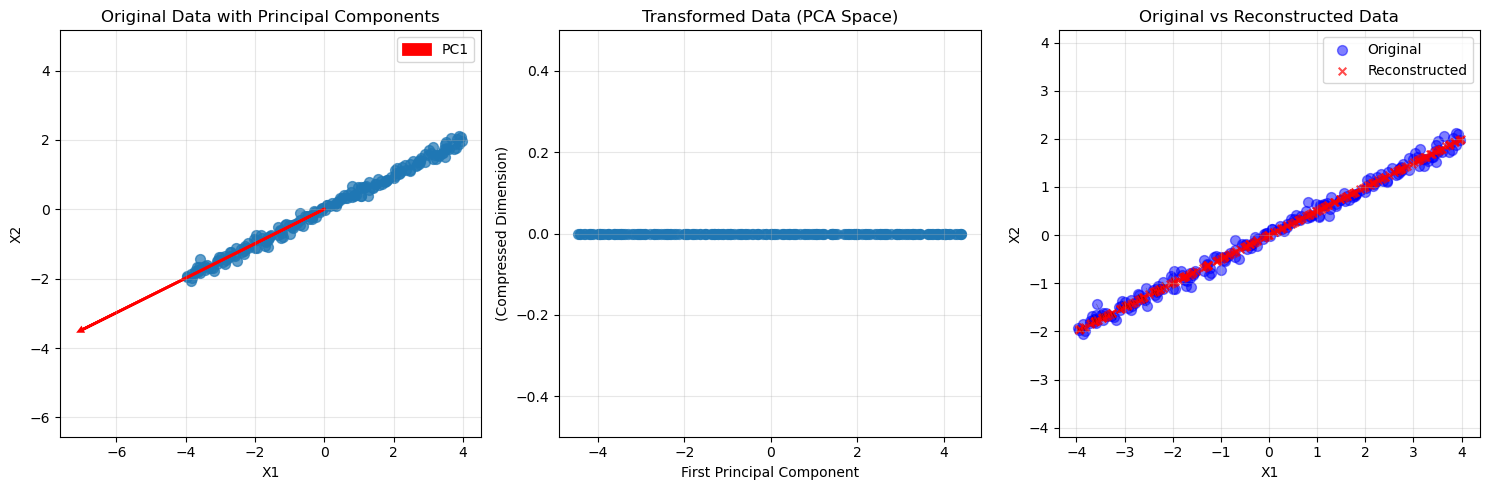


4. Comparing eigen vs SVD methods...
   Eigen method eigenvalue: 6.772072
   SVD method eigenvalue: 6.772072
   Difference: 1.78e-15

5. Higher dimensional example (3D -> 2D)...
   Original shape: (300, 3)
   Explained variance ratios: [6.33782590e-01 3.65608921e-01 6.08489026e-04]
   Cumulative explained variance: [0.63378259 0.99939151 1.        ]


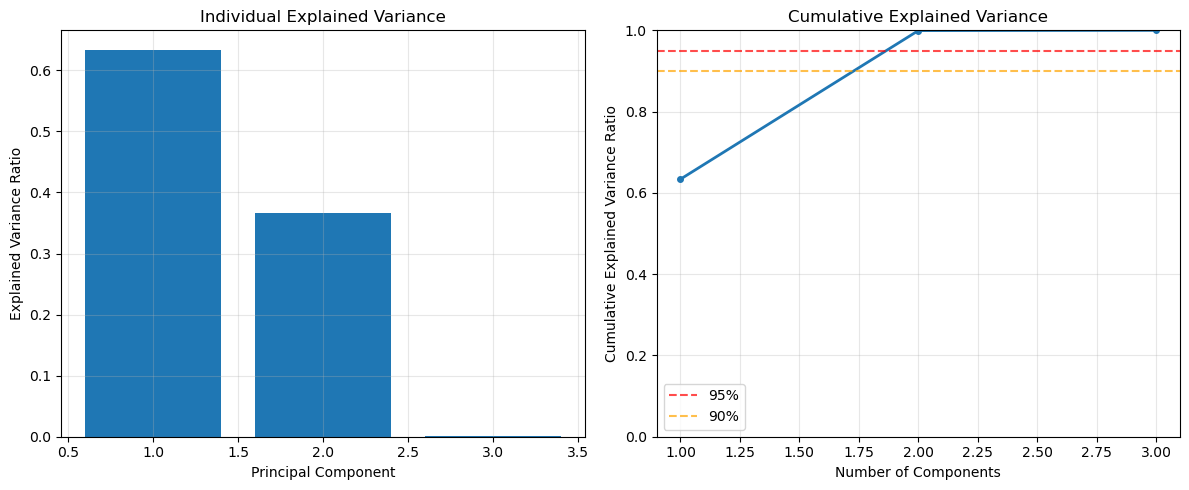

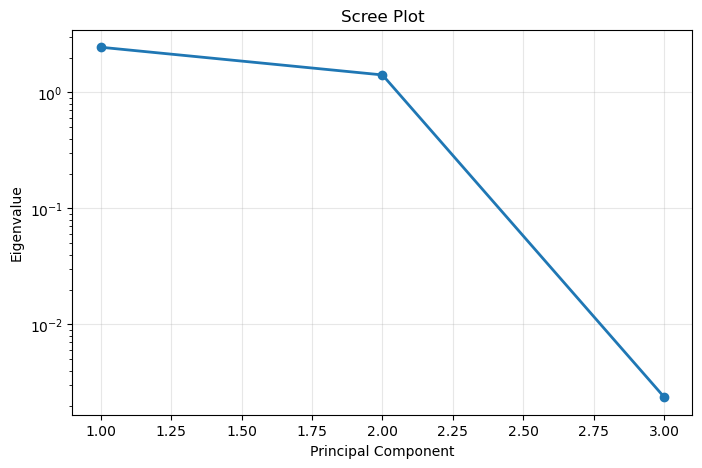


=== Demonstration Complete ===


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Tuple, Union
import warnings

class PCA:
    """
    Principal Component Analysis implementation from scratch.
    
    Based on the mathematical framework:
    - Data covariance matrix: S = (1/N) * X_centered^T @ X_centered
    - Eigendecomposition: S = U @ Λ @ U^T
    - Projection: z = B^T @ x, reconstruction: x_tilde = B @ z
    """
    
    def __init__(self, n_components: Optional[int] = None, 
                 method: str = 'eigen', 
                 center: bool = True,
                 scale: bool = False):
        """
        Initialize PCA.
        
        Parameters:
        -----------
        n_components : int, optional
            Number of principal components to keep. If None, keep all.
        method : str, default='eigen'
            Method to use: 'eigen' for eigendecomposition, 'svd' for SVD
        center : bool, default=True
            Whether to center the data (subtract mean)
        scale : bool, default=False
            Whether to scale the data to unit variance
        """
        self.n_components = n_components
        self.method = method
        self.center = center
        self.scale = scale
        
        # Will be set during fit
        self.mean_ = None
        self.std_ = None
        self.components_ = None  # B matrix (D x M)
        self.eigenvalues_ = None  # λ values
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
        self.n_features_ = None
        self.n_samples_ = None
        
    def _preprocess_data(self, X: np.ndarray) -> np.ndarray:
        """Center and optionally scale the data."""
        X_processed = X.copy()
        
        if self.center:
            if self.mean_ is None:
                self.mean_ = np.mean(X, axis=0)
            X_processed = X_processed - self.mean_
            
        if self.scale:
            if self.std_ is None:
                self.std_ = np.std(X_processed, axis=0)
                # Avoid division by zero
                self.std_[self.std_ == 0] = 1.0
            X_processed = X_processed / self.std_
            
        return X_processed
    
    def _compute_covariance_matrix(self, X_centered: np.ndarray) -> np.ndarray:
        """
        Compute the data covariance matrix S = (1/N) * X^T @ X.
        """
        N = X_centered.shape[0]
        return (1.0 / N) * X_centered.T @ X_centered
    
    def _eigendecomposition_method(self, X_centered: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        PCA via eigendecomposition of covariance matrix.
        
        Returns:
        --------
        eigenvalues : ndarray of shape (n_features,)
            Eigenvalues in descending order
        eigenvectors : ndarray of shape (n_features, n_features)
            Eigenvectors corresponding to eigenvalues
        """
        # Compute covariance matrix
        S = self._compute_covariance_matrix(X_centered)
        
        # Eigendecomposition: S = U @ Λ @ U^T
        eigenvalues, eigenvectors = np.linalg.eigh(S)
        
        # Sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        return eigenvalues, eigenvectors
    
    def _svd_method(self, X_centered: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """
        PCA via Singular Value Decomposition.
        
        For X_centered = V @ Σ @ U^T:
        - U contains right singular vectors (our principal components)
        - Σ^2 / N gives eigenvalues
        
        Returns:
        --------
        eigenvalues : ndarray of shape (n_features,)
            Eigenvalues derived from singular values
        eigenvectors : ndarray of shape (n_features, n_features)
            Principal components (right singular vectors)
        """
        N, D = X_centered.shape
        
        # SVD: X = V @ Σ @ U^T
        V, singular_values, Ut = np.linalg.svd(X_centered, full_matrices=False)
        
        # Principal components are columns of U (rows of U^T)
        eigenvectors = Ut.T
        
        # Convert singular values to eigenvalues: λ = σ^2 / N
        eigenvalues = (singular_values ** 2) / N
        
        # Pad with zeros if needed (when N < D)
        if len(eigenvalues) < D:
            eigenvalues = np.concatenate([eigenvalues, np.zeros(D - len(eigenvalues))])
            # Pad eigenvectors
            if eigenvectors.shape[1] < D:
                padding = np.zeros((D, D - eigenvectors.shape[1]))
                eigenvectors = np.hstack([eigenvectors, padding])
        
        return eigenvalues, eigenvectors
    
    def fit(self, X: np.ndarray) -> 'PCA':
        """
        Fit PCA to the data.
        
        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            Training data
            
        Returns:
        --------
        self : PCA
            Fitted PCA object
        """
        X = np.asarray(X)
        self.n_samples_, self.n_features_ = X.shape
        
        # Preprocess data (center and optionally scale)
        X_processed = self._preprocess_data(X)
        
        # Choose method for computing principal components
        if self.method == 'eigen':
            eigenvalues, eigenvectors = self._eigendecomposition_method(X_processed)
        elif self.method == 'svd':
            eigenvalues, eigenvectors = self._svd_method(X_processed)
        else:
            raise ValueError(f"Unknown method: {self.method}. Use 'eigen' or 'svd'.")
        
        # Store results
        self.eigenvalues_ = eigenvalues
        self.explained_variance_ = eigenvalues.copy()
        
        # Compute explained variance ratio
        total_variance = np.sum(eigenvalues)
        if total_variance > 0:
            self.explained_variance_ratio_ = eigenvalues / total_variance
        else:
            self.explained_variance_ratio_ = np.zeros_like(eigenvalues)
        
        # Set number of components if not specified
        if self.n_components is None:
            self.n_components = self.n_features_
        else:
            self.n_components = min(self.n_components, self.n_features_)
        
        # Store principal components (B matrix)
        self.components_ = eigenvectors[:, :self.n_components]
        
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Transform data to lower dimensional space.
        
        Applies the transformation: z = B^T @ (x - μ)
        
        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            Data to transform
            
        Returns:
        --------
        X_transformed : ndarray of shape (n_samples, n_components)
            Transformed data (codes)
        """
        if self.components_ is None:
            raise ValueError("PCA has not been fitted yet. Call fit() first.")
        
        X = np.asarray(X)
        
        # Preprocess using stored parameters
        X_processed = X.copy()
        if self.center and self.mean_ is not None:
            X_processed = X_processed - self.mean_
        if self.scale and self.std_ is not None:
            X_processed = X_processed / self.std_
        
        # Project onto principal components: z = B^T @ x
        return X_processed @ self.components_
    
    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        """Fit PCA and transform the data."""
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X_transformed: np.ndarray) -> np.ndarray:
        """
        Transform data back to original space.
        
        Applies: x_tilde = B @ z + μ
        
        Parameters:
        -----------
        X_transformed : ndarray of shape (n_samples, n_components)
            Transformed data (codes)
            
        Returns:
        --------
        X_reconstructed : ndarray of shape (n_samples, n_features)
            Reconstructed data in original space
        """
        if self.components_ is None:
            raise ValueError("PCA has not been fitted yet. Call fit() first.")
        
        X_transformed = np.asarray(X_transformed)
        
        # Reconstruct: x_tilde = B @ z
        X_reconstructed = X_transformed @ self.components_.T
        
        # Reverse preprocessing
        if self.scale and self.std_ is not None:
            X_reconstructed = X_reconstructed * self.std_
        if self.center and self.mean_ is not None:
            X_reconstructed = X_reconstructed + self.mean_
            
        return X_reconstructed
    
    def reconstruction_error(self, X: np.ndarray) -> float:
        """
        Compute reconstruction error: ||X - X_tilde||_F^2
        
        Parameters:
        -----------
        X : ndarray of shape (n_samples, n_features)
            Original data
            
        Returns:
        --------
        error : float
            Frobenius norm of reconstruction error
        """
        X_transformed = self.transform(X)
        X_reconstructed = self.inverse_transform(X_transformed)
        return np.linalg.norm(X - X_reconstructed, 'fro') ** 2
    
    def cumulative_explained_variance_ratio(self) -> np.ndarray:
        """Compute cumulative explained variance ratio."""
        if self.explained_variance_ratio_ is None:
            raise ValueError("PCA has not been fitted yet.")
        return np.cumsum(self.explained_variance_ratio_)
    
    def plot_explained_variance(self, n_components: int = 20, 
                              figsize: Tuple[int, int] = (12, 5)) -> None:
        """
        Plot explained variance and cumulative explained variance.
        
        Parameters:
        -----------
        n_components : int, default=20
            Number of components to show in plot
        figsize : tuple, default=(12, 5)
            Figure size
        """
        if self.explained_variance_ratio_ is None:
            raise ValueError("PCA has not been fitted yet.")
        
        n_show = min(n_components, len(self.explained_variance_ratio_))
        components = np.arange(1, n_show + 1)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
        
        # Individual explained variance
        ax1.bar(components, self.explained_variance_ratio_[:n_show])
        ax1.set_xlabel('Principal Component')
        ax1.set_ylabel('Explained Variance Ratio')
        ax1.set_title('Individual Explained Variance')
        ax1.grid(True, alpha=0.3)
        
        # Cumulative explained variance
        cumsum_var = self.cumulative_explained_variance_ratio()
        ax2.plot(components, cumsum_var[:n_show], 'o-', linewidth=2, markersize=4)
        ax2.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95%')
        ax2.axhline(y=0.90, color='orange', linestyle='--', alpha=0.7, label='90%')
        ax2.set_xlabel('Number of Components')
        ax2.set_ylabel('Cumulative Explained Variance Ratio')
        ax2.set_title('Cumulative Explained Variance')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        ax2.set_ylim(0, 1)
        
        plt.tight_layout()
        plt.show()
    
    def plot_scree(self, n_components: int = 20, 
                   figsize: Tuple[int, int] = (8, 5)) -> None:
        """
        Plot scree plot (eigenvalues).
        
        Parameters:
        -----------
        n_components : int, default=20
            Number of components to show
        figsize : tuple, default=(8, 5)
            Figure size
        """
        if self.eigenvalues_ is None:
            raise ValueError("PCA has not been fitted yet.")
        
        n_show = min(n_components, len(self.eigenvalues_))
        components = np.arange(1, n_show + 1)
        
        plt.figure(figsize=figsize)
        plt.plot(components, self.eigenvalues_[:n_show], 'o-', linewidth=2, markersize=6)
        plt.xlabel('Principal Component')
        plt.ylabel('Eigenvalue')
        plt.title('Scree Plot')
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
        plt.show()


# Utility functions for data generation and visualization

def generate_2d_data(n_samples: int = 200, noise: float = 0.1) -> np.ndarray:
    """
    Generate 2D data lying approximately on a line for PCA demonstration.
    
    Parameters:
    -----------
    n_samples : int, default=200
        Number of samples to generate
    noise : float, default=0.1
        Noise level
        
    Returns:
    --------
    X : ndarray of shape (n_samples, 2)
        Generated 2D data
    """
    np.random.seed(42)
    
    # Generate data along a line with some noise
    t = np.linspace(-2, 2, n_samples)
    x1 = 2 * t + np.random.normal(0, noise, n_samples)
    x2 = t + np.random.normal(0, noise, n_samples)
    
    return np.column_stack([x1, x2])


def generate_3d_data(n_samples: int = 300, noise: float = 0.1) -> np.ndarray:
    """
    Generate 3D data lying approximately on a 2D plane.
    
    Parameters:
    -----------
    n_samples : int, default=300
        Number of samples
    noise : float, default=0.1
        Noise level
        
    Returns:
    --------
    X : ndarray of shape (n_samples, 3)
        Generated 3D data
    """
    np.random.seed(42)
    
    # Generate data on a plane with noise
    u = np.random.uniform(-2, 2, n_samples)
    v = np.random.uniform(-2, 2, n_samples)
    
    x1 = u + 0.5 * v + np.random.normal(0, noise, n_samples)
    x2 = 0.8 * u - 0.3 * v + np.random.normal(0, noise, n_samples)  
    x3 = 0.2 * u + 0.9 * v + np.random.normal(0, noise, n_samples)
    
    return np.column_stack([x1, x2, x3])


def plot_2d_pca_results(X: np.ndarray, pca: PCA, figsize: Tuple[int, int] = (15, 5)) -> None:
    """
    Visualize 2D PCA results.
    
    Parameters:
    -----------
    X : ndarray of shape (n_samples, 2)
        Original 2D data
    pca : PCA
        Fitted PCA object
    figsize : tuple, default=(15, 5)
        Figure size
    """
    # Transform and reconstruct
    X_transformed = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # Original data with principal components
    axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7, s=50)
    
    # Plot principal components as arrows from mean
    mean = pca.mean_ if pca.mean_ is not None else np.zeros(2)
    colors = ['red', 'blue']
    for i in range(min(2, pca.n_components)):
        # Scale arrows for visibility
        scale = 3 * np.sqrt(pca.eigenvalues_[i])
        pc = pca.components_[:, i] * scale
        axes[0].arrow(mean[0], mean[1], pc[0], pc[1], 
                     head_width=0.1, head_length=0.1, fc=colors[i], ec=colors[i],
                     linewidth=2, label=f'PC{i+1}')
    
    axes[0].set_xlabel('X1')
    axes[0].set_ylabel('X2')
    axes[0].set_title('Original Data with Principal Components')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].axis('equal')
    
    # Transformed data (1D if n_components=1)
    if pca.n_components == 1:
        axes[1].scatter(X_transformed[:, 0], np.zeros_like(X_transformed[:, 0]), 
                       alpha=0.7, s=50)
        axes[1].set_xlabel('First Principal Component')
        axes[1].set_ylabel('(Compressed Dimension)')
        axes[1].set_ylim(-0.5, 0.5)
    else:
        axes[1].scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.7, s=50)
        axes[1].set_xlabel('First Principal Component')
        axes[1].set_ylabel('Second Principal Component')
    
    axes[1].set_title('Transformed Data (PCA Space)')
    axes[1].grid(True, alpha=0.3)
    
    # Reconstructed data
    axes[2].scatter(X[:, 0], X[:, 1], alpha=0.5, s=50, label='Original', color='blue')
    axes[2].scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], 
                   alpha=0.7, s=30, label='Reconstructed', color='red', marker='x')
    
    # Draw reconstruction lines
    for i in range(min(50, len(X))):  # Show only first 50 for clarity
        axes[2].plot([X[i, 0], X_reconstructed[i, 0]], 
                    [X[i, 1], X_reconstructed[i, 1]], 
                    'k-', alpha=0.3, linewidth=0.5)
    
    axes[2].set_xlabel('X1')
    axes[2].set_ylabel('X2')
    axes[2].set_title('Original vs Reconstructed Data')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    axes[2].axis('equal')
    
    plt.tight_layout()
    plt.show()


def demonstrate_pca_compression():
    """Comprehensive demonstration of PCA for data compression."""
    print("=== PCA Implementation Demonstration ===\n")
    
    # Generate sample data
    print("1. Generating 2D sample data...")
    X_2d = generate_2d_data(n_samples=200, noise=0.1)
    print(f"   Data shape: {X_2d.shape}")
    print(f"   Data mean: {np.mean(X_2d, axis=0)}")
    print(f"   Data std: {np.std(X_2d, axis=0)}")
    
    # Fit PCA with 1 component
    print("\n2. Fitting PCA with 1 component...")
    pca_1d = PCA(n_components=1, method='eigen')
    pca_1d.fit(X_2d)
    
    print(f"   Explained variance ratio: {pca_1d.explained_variance_ratio_[0]:.3f}")
    print(f"   First principal component: {pca_1d.components_[:, 0]}")
    print(f"   Eigenvalues: {pca_1d.eigenvalues_[:2]}")
    
    # Transform and reconstruct
    X_transformed = pca_1d.transform(X_2d)
    X_reconstructed = pca_1d.inverse_transform(X_transformed)
    reconstruction_error = pca_1d.reconstruction_error(X_2d)
    
    print(f"   Reconstruction error: {reconstruction_error:.3f}")
    print(f"   Compression ratio: {X_2d.size / X_transformed.size:.1f}:1")
    
    # Visualize results
    print("\n3. Visualizing results...")
    plot_2d_pca_results(X_2d, pca_1d)
    
    # Compare methods
    print("\n4. Comparing eigen vs SVD methods...")
    pca_svd = PCA(n_components=1, method='svd')
    pca_svd.fit(X_2d)
    
    print(f"   Eigen method eigenvalue: {pca_1d.eigenvalues_[0]:.6f}")
    print(f"   SVD method eigenvalue: {pca_svd.eigenvalues_[0]:.6f}")
    print(f"   Difference: {abs(pca_1d.eigenvalues_[0] - pca_svd.eigenvalues_[0]):.2e}")
    
    # Higher dimensional example
    print("\n5. Higher dimensional example (3D -> 2D)...")
    X_3d = generate_3d_data(n_samples=300, noise=0.05)
    pca_3d = PCA(n_components=2)
    pca_3d.fit(X_3d)
    
    print(f"   Original shape: {X_3d.shape}")
    print(f"   Explained variance ratios: {pca_3d.explained_variance_ratio_[:3]}")
    print(f"   Cumulative explained variance: {pca_3d.cumulative_explained_variance_ratio()[:3]}")
    
    # Plot explained variance
    pca_3d.plot_explained_variance(n_components=3)
    pca_3d.plot_scree(n_components=3)
    
    print("\n=== Demonstration Complete ===")


if __name__ == "__main__":
    # Run demonstration
    demonstrate_pca_compression()

In [2]:
import math
import random
from typing import List, Tuple, Optional, Union

class Matrix:
    """
    Matrix class with basic linear algebra operations implemented from scratch.
    """
    
    def __init__(self, data: List[List[float]]):
        """
        Initialize matrix from 2D list.
        
        Parameters:
        -----------
        data : List[List[float]]
            2D list representing matrix rows
        """
        self.data = [row[:] for row in data]  # Deep copy
        self.rows = len(data)
        self.cols = len(data[0]) if data else 0
        
        # Validate matrix dimensions
        for row in data:
            if len(row) != self.cols:
                raise ValueError("All rows must have the same length")
    
    @classmethod
    def zeros(cls, rows: int, cols: int) -> 'Matrix':
        """Create matrix filled with zeros."""
        return cls([[0.0] * cols for _ in range(rows)])
    
    @classmethod
    def identity(cls, size: int) -> 'Matrix':
        """Create identity matrix."""
        data = [[0.0] * size for _ in range(size)]
        for i in range(size):
            data[i][i] = 1.0
        return cls(data)
    
    @classmethod
    def from_vectors(cls, vectors: List[List[float]], by_rows: bool = True) -> 'Matrix':
        """
        Create matrix from list of vectors.
        
        Parameters:
        -----------
        vectors : List[List[float]]
            List of vectors
        by_rows : bool, default=True
            If True, vectors are rows; if False, vectors are columns
        """
        if by_rows:
            return cls(vectors)
        else:
            # Transpose to make columns into rows
            if not vectors:
                return cls([])
            n_rows = len(vectors[0])
            n_cols = len(vectors)
            data = [[vectors[j][i] for j in range(n_cols)] for i in range(n_rows)]
            return cls(data)
    
    def __getitem__(self, key: Tuple[int, int]) -> float:
        """Get element at (row, col)."""
        return self.data[key[0]][key[1]]
    
    def __setitem__(self, key: Tuple[int, int], value: float) -> None:
        """Set element at (row, col)."""
        self.data[key[0]][key[1]] = value
    
    def get_row(self, i: int) -> List[float]:
        """Get row i as a list."""
        return self.data[i][:]
    
    def get_col(self, j: int) -> List[float]:
        """Get column j as a list."""
        return [self.data[i][j] for i in range(self.rows)]
    
    def set_row(self, i: int, row: List[float]) -> None:
        """Set row i."""
        if len(row) != self.cols:
            raise ValueError(f"Row length {len(row)} doesn't match matrix columns {self.cols}")
        self.data[i] = row[:]
    
    def set_col(self, j: int, col: List[float]) -> None:
        """Set column j."""
        if len(col) != self.rows:
            raise ValueError(f"Column length {len(col)} doesn't match matrix rows {self.rows}")
        for i in range(self.rows):
            self.data[i][j] = col[i]
    
    def transpose(self) -> 'Matrix':
        """Return transpose of matrix."""
        data = [[self.data[i][j] for i in range(self.rows)] for j in range(self.cols)]
        return Matrix(data)
    
    def __add__(self, other: 'Matrix') -> 'Matrix':
        """Matrix addition."""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrices must have same dimensions for addition")
        
        result = Matrix.zeros(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result[i, j] = self[i, j] + other[i, j]
        return result
    
    def __sub__(self, other: 'Matrix') -> 'Matrix':
        """Matrix subtraction."""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Matrices must have same dimensions for subtraction")
        
        result = Matrix.zeros(self.rows, self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                result[i, j] = self[i, j] - other[i, j]
        return result
    
    def __mul__(self, other: Union['Matrix', float]) -> 'Matrix':
        """Matrix multiplication or scalar multiplication."""
        if isinstance(other, (int, float)):
            # Scalar multiplication
            result = Matrix.zeros(self.rows, self.cols)
            for i in range(self.rows):
                for j in range(self.cols):
                    result[i, j] = self[i, j] * other
            return result
        elif isinstance(other, Matrix):
            # Matrix multiplication
            if self.cols != other.rows:
                raise ValueError(f"Cannot multiply {self.rows}x{self.cols} with {other.rows}x{other.cols}")
            
            result = Matrix.zeros(self.rows, other.cols)
            for i in range(self.rows):
                for j in range(other.cols):
                    for k in range(self.cols):
                        result[i, j] += self[i, k] * other[k, j]
            return result
        else:
            raise TypeError("Can only multiply by Matrix or scalar")
    
    def __rmul__(self, scalar: float) -> 'Matrix':
        """Right scalar multiplication."""
        return self * scalar
    
    def frobenius_norm(self) -> float:
        """Compute Frobenius norm: sqrt(sum of squares of all elements)."""
        sum_squares = 0.0
        for i in range(self.rows):
            for j in range(self.cols):
                sum_squares += self[i, j] ** 2
        return math.sqrt(sum_squares)
    
    def trace(self) -> float:
        """Compute trace (sum of diagonal elements)."""
        if self.rows != self.cols:
            raise ValueError("Trace is only defined for square matrices")
        return sum(self[i, i] for i in range(self.rows))
    
    def __str__(self) -> str:
        """String representation of matrix."""
        lines = []
        for row in self.data:
            line = "[" + ", ".join(f"{x:8.4f}" for x in row) + "]"
            lines.append(line)
        return "\n".join(lines)


class LinearAlgebra:
    """
    Linear algebra operations implemented from scratch.
    """
    
    @staticmethod
    def dot_product(a: List[float], b: List[float]) -> float:
        """Compute dot product of two vectors."""
        if len(a) != len(b):
            raise ValueError("Vectors must have same length")
        return sum(a[i] * b[i] for i in range(len(a)))
    
    @staticmethod
    def vector_norm(v: List[float]) -> float:
        """Compute Euclidean norm of vector."""
        return math.sqrt(sum(x * x for x in v))
    
    @staticmethod
    def normalize_vector(v: List[float]) -> List[float]:
        """Normalize vector to unit length."""
        norm = LinearAlgebra.vector_norm(v)
        if norm == 0:
            return v[:]
        return [x / norm for x in v]
    
    @staticmethod
    def vector_subtract(a: List[float], b: List[float]) -> List[float]:
        """Subtract vector b from vector a."""
        if len(a) != len(b):
            raise ValueError("Vectors must have same length")
        return [a[i] - b[i] for i in range(len(a))]
    
    @staticmethod
    def vector_add(a: List[float], b: List[float]) -> List[float]:
        """Add two vectors."""
        if len(a) != len(b):
            raise ValueError("Vectors must have same length")
        return [a[i] + b[i] for i in range(len(a))]
    
    @staticmethod
    def scalar_multiply(v: List[float], scalar: float) -> List[float]:
        """Multiply vector by scalar."""
        return [x * scalar for x in v]
    
    @staticmethod
    def compute_mean(data: List[List[float]]) -> List[float]:
        """Compute mean of data points (each row is a data point)."""
        if not data:
            return []
        
        n_samples = len(data)
        n_features = len(data[0])
        
        mean = [0.0] * n_features
        for sample in data:
            for j in range(n_features):
                mean[j] += sample[j]
        
        return [x / n_samples for x in mean]
    
    @staticmethod
    def center_data(data: List[List[float]], mean: Optional[List[float]] = None) -> Tuple[List[List[float]], List[float]]:
        """
        Center data by subtracting mean.
        
        Returns:
        --------
        centered_data : List[List[float]]
            Data with mean subtracted
        mean : List[float]
            Computed mean (if not provided)
        """
        if mean is None:
            mean = LinearAlgebra.compute_mean(data)
        
        centered_data = []
        for sample in data:
            centered_sample = LinearAlgebra.vector_subtract(sample, mean)
            centered_data.append(centered_sample)
        
        return centered_data, mean
    
    @staticmethod
    def power_iteration(matrix: Matrix, max_iterations: int = 1000, tolerance: float = 1e-10) -> Tuple[float, List[float]]:
        """
        Find largest eigenvalue and eigenvector using power iteration.
        
        Parameters:
        -----------
        matrix : Matrix
            Square matrix
        max_iterations : int, default=1000
            Maximum number of iterations
        tolerance : float, default=1e-10
            Convergence tolerance
            
        Returns:
        --------
        eigenvalue : float
            Largest eigenvalue
        eigenvector : List[float]
            Corresponding eigenvector (normalized)
        """
        if matrix.rows != matrix.cols:
            raise ValueError("Matrix must be square")
        
        n = matrix.rows
        # Start with random vector
        random.seed(42)
        v = [random.random() for _ in range(n)]
        v = LinearAlgebra.normalize_vector(v)
        
        for iteration in range(max_iterations):
            # Matrix-vector multiplication: Av
            Av = [0.0] * n
            for i in range(n):
                for j in range(n):
                    Av[i] += matrix[i, j] * v[j]
            
            # Compute eigenvalue estimate: v^T * A * v
            eigenvalue = LinearAlgebra.dot_product(v, Av)
            
            # Normalize
            v_new = LinearAlgebra.normalize_vector(Av)
            
            # Check convergence
            diff = sum((v_new[i] - v[i]) ** 2 for i in range(n))
            if diff < tolerance:
                break
            
            v = v_new
        
        return eigenvalue, v
    
    @staticmethod
    def deflation(matrix: Matrix, eigenvalue: float, eigenvector: List[float]) -> Matrix:
        """
        Remove (deflate) an eigenvalue/eigenvector pair from matrix.
        
        A_new = A - λ * v * v^T
        """
        n = matrix.rows
        result = Matrix.zeros(n, n)
        
        # Copy original matrix
        for i in range(n):
            for j in range(n):
                result[i, j] = matrix[i, j]
        
        # Subtract λ * v * v^T
        for i in range(n):
            for j in range(n):
                result[i, j] -= eigenvalue * eigenvector[i] * eigenvector[j]
        
        return result


class PCA:
    """
    Principal Component Analysis implementation using only core Python.
    
    Based on the mathematical framework:
    - Data covariance matrix: S = (1/N) * X_centered^T @ X_centered  
    - Eigendecomposition: S = U @ Λ @ U^T
    - Projection: z = B^T @ (x - μ)
    - Reconstruction: x_tilde = B @ z + μ
    """
    
    def __init__(self, n_components: Optional[int] = None, max_iterations: int = 1000, tolerance: float = 1e-8):
        """
        Initialize PCA.
        
        Parameters:
        -----------
        n_components : int, optional
            Number of principal components to keep
        max_iterations : int, default=1000
            Maximum iterations for eigenvalue computation
        tolerance : float, default=1e-8
            Convergence tolerance for eigenvalue computation
        """
        self.n_components = n_components
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        
        # Will be set during fit
        self.mean_ = None
        self.components_ = None  # Principal components (eigenvectors)
        self.eigenvalues_ = None
        self.explained_variance_ratio_ = None
        self.n_features_ = None
        self.n_samples_ = None
    
    def _compute_covariance_matrix(self, X_centered: List[List[float]]) -> Matrix:
        """
        Compute covariance matrix: S = (1/N) * X^T @ X
        
        Parameters:
        -----------
        X_centered : List[List[float]]
            Centered data matrix (n_samples x n_features)
            
        Returns:
        --------
        covariance : Matrix
            Covariance matrix (n_features x n_features)
        """
        n_samples = len(X_centered)
        n_features = len(X_centered[0])
        
        # Initialize covariance matrix
        cov = Matrix.zeros(n_features, n_features)
        
        # Compute S = (1/N) * X^T @ X
        for i in range(n_features):
            for j in range(n_features):
                sum_product = 0.0
                for k in range(n_samples):
                    sum_product += X_centered[k][i] * X_centered[k][j]
                cov[i, j] = sum_product / n_samples
        
        return cov
    
    def _find_eigenvalues_eigenvectors(self, matrix: Matrix, n_components: int) -> Tuple[List[float], List[List[float]]]:
        """
        Find top n_components eigenvalues and eigenvectors using power iteration and deflation.
        
        Parameters:
        -----------
        matrix : Matrix
            Covariance matrix
        n_components : int
            Number of components to find
            
        Returns:
        --------
        eigenvalues : List[float]
            Eigenvalues in descending order
        eigenvectors : List[List[float]]
            Corresponding eigenvectors
        """
        eigenvalues = []
        eigenvectors = []
        
        # Work with a copy to avoid modifying original
        current_matrix = Matrix([row[:] for row in matrix.data])
        
        for _ in range(n_components):
            # Find largest eigenvalue and eigenvector
            eigenvalue, eigenvector = LinearAlgebra.power_iteration(
                current_matrix, self.max_iterations, self.tolerance
            )
            
            # Stop if eigenvalue is too small (numerical precision issues)
            if abs(eigenvalue) < self.tolerance:
                break
            
            eigenvalues.append(eigenvalue)
            eigenvectors.append(eigenvector)
            
            # Deflate matrix to find next eigenvalue
            current_matrix = LinearAlgebra.deflation(current_matrix, eigenvalue, eigenvector)
        
        return eigenvalues, eigenvectors
    
    def fit(self, X: List[List[float]]) -> 'PCA':
        """
        Fit PCA to the data.
        
        Parameters:
        -----------
        X : List[List[float]]
            Training data (n_samples x n_features)
            
        Returns:
        --------
        self : PCA
            Fitted PCA object
        """
        if not X or not X[0]:
            raise ValueError("Data cannot be empty")
        
        self.n_samples_ = len(X)
        self.n_features_ = len(X[0])
        
        # Set number of components if not specified
        if self.n_components is None:
            self.n_components = self.n_features_
        else:
            self.n_components = min(self.n_components, self.n_features_)
        
        # Center the data
        X_centered, self.mean_ = LinearAlgebra.center_data(X)
        
        # Compute covariance matrix
        cov_matrix = self._compute_covariance_matrix(X_centered)
        
        # Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = self._find_eigenvalues_eigenvectors(cov_matrix, self.n_components)
        
        # Store results
        self.eigenvalues_ = eigenvalues
        self.components_ = eigenvectors
        
        # Compute explained variance ratio
        total_variance = sum(eigenvalues)
        if total_variance > 0:
            self.explained_variance_ratio_ = [ev / total_variance for ev in eigenvalues]
        else:
            self.explained_variance_ratio_ = [0.0] * len(eigenvalues)
        
        return self
    
    def transform(self, X: List[List[float]]) -> List[List[float]]:
        """
        Transform data to lower dimensional space.
        
        Applies: z = B^T @ (x - μ)
        
        Parameters:
        -----------
        X : List[List[float]]
            Data to transform
            
        Returns:
        --------
        X_transformed : List[List[float]]
            Transformed data
        """
        if self.components_ is None:
            raise ValueError("PCA has not been fitted yet. Call fit() first.")
        
        # Center the data
        X_centered = []
        for sample in X:
            centered_sample = LinearAlgebra.vector_subtract(sample, self.mean_)
            X_centered.append(centered_sample)
        
        # Project onto principal components: z = x^T @ B
        X_transformed = []
        for sample in X_centered:
            transformed_sample = []
            for component in self.components_:
                projection = LinearAlgebra.dot_product(sample, component)
                transformed_sample.append(projection)
            X_transformed.append(transformed_sample)
        
        return X_transformed
    
    def fit_transform(self, X: List[List[float]]) -> List[List[float]]:
        """Fit PCA and transform the data."""
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X_transformed: List[List[float]]) -> List[List[float]]:
        """
        Transform data back to original space.
        
        Applies: x_tilde = B @ z + μ
        
        Parameters:
        -----------
        X_transformed : List[List[float]]
            Transformed data
            
        Returns:
        --------
        X_reconstructed : List[List[float]]
            Reconstructed data in original space
        """
        if self.components_ is None:
            raise ValueError("PCA has not been fitted yet. Call fit() first.")
        
        X_reconstructed = []
        for transformed_sample in X_transformed:
            # Reconstruct: x = sum(z_i * component_i) + mean
            reconstructed_sample = [0.0] * self.n_features_
            
            for i, (coeff, component) in enumerate(zip(transformed_sample, self.components_)):
                for j in range(self.n_features_):
                    reconstructed_sample[j] += coeff * component[j]
            
            # Add back the mean
            reconstructed_sample = LinearAlgebra.vector_add(reconstructed_sample, self.mean_)
            X_reconstructed.append(reconstructed_sample)
        
        return X_reconstructed
    
    def reconstruction_error(self, X: List[List[float]]) -> float:
        """
        Compute reconstruction error: ||X - X_tilde||_F^2
        
        Parameters:
        -----------
        X : List[List[float]]
            Original data
            
        Returns:
        --------
        error : float
            Frobenius norm squared of reconstruction error
        """
        X_transformed = self.transform(X)
        X_reconstructed = self.inverse_transform(X_transformed)
        
        error = 0.0
        for i in range(len(X)):
            for j in range(len(X[0])):
                diff = X[i][j] - X_reconstructed[i][j]
                error += diff * diff
        
        return error
    
    def cumulative_explained_variance_ratio(self) -> List[float]:
        """Compute cumulative explained variance ratio."""
        if self.explained_variance_ratio_ is None:
            raise ValueError("PCA has not been fitted yet.")
        
        cumsum = []
        total = 0.0
        for ratio in self.explained_variance_ratio_:
            total += ratio
            cumsum.append(total)
        
        return cumsum
    
    def print_summary(self) -> None:
        """Print summary of PCA results."""
        if self.components_ is None:
            print("PCA has not been fitted yet.")
            return
        
        print("=== PCA Summary ===")
        print(f"Number of samples: {self.n_samples_}")
        print(f"Number of features: {self.n_features_}")
        print(f"Number of components: {len(self.components_)}")
        print(f"Data mean: {[f'{x:.4f}' for x in self.mean_]}")
        print("\nPrincipal Components:")
        for i, (eigenval, component) in enumerate(zip(self.eigenvalues_, self.components_)):
            print(f"  PC{i+1}: eigenvalue = {eigenval:.6f}, "
                  f"explained variance = {self.explained_variance_ratio_[i]:.4f}")
            print(f"       component = {[f'{x:.4f}' for x in component]}")
        
        cum_var = self.cumulative_explained_variance_ratio()
        print(f"\nCumulative explained variance: {[f'{x:.4f}' for x in cum_var]}")


# Utility functions and demonstrations

def generate_2d_data(n_samples: int = 100, noise: float = 0.1, seed: int = 42) -> List[List[float]]:
    """
    Generate 2D data lying approximately on a line.
    
    Parameters:
    -----------
    n_samples : int, default=100
        Number of samples
    noise : float, default=0.1
        Noise level
    seed : int, default=42
        Random seed
        
    Returns:
    --------
    X : List[List[float]]
        Generated 2D data
    """
    random.seed(seed)
    
    X = []
    for i in range(n_samples):
        t = -2 + 4 * i / (n_samples - 1)  # t from -2 to 2
        x1 = 2 * t + random.gauss(0, noise)
        x2 = t + random.gauss(0, noise)
        X.append([x1, x2])
    
    return X


def generate_3d_data(n_samples: int = 150, noise: float = 0.1, seed: int = 42) -> List[List[float]]:
    """
    Generate 3D data lying approximately on a 2D plane.
    
    Parameters:
    -----------
    n_samples : int, default=150
        Number of samples
    noise : float, default=0.1
        Noise level  
    seed : int, default=42
        Random seed
        
    Returns:
    --------
    X : List[List[float]]
        Generated 3D data
    """
    random.seed(seed)
    
    X = []
    for _ in range(n_samples):
        u = random.uniform(-2, 2)
        v = random.uniform(-2, 2)
        
        x1 = u + 0.5 * v + random.gauss(0, noise)
        x2 = 0.8 * u - 0.3 * v + random.gauss(0, noise)
        x3 = 0.2 * u + 0.9 * v + random.gauss(0, noise)
        
        X.append([x1, x2, x3])
    
    return X


def print_data_info(X: List[List[float]], name: str = "Data") -> None:
    """Print basic information about dataset."""
    if not X:
        print(f"{name}: Empty dataset")
        return
    
    n_samples = len(X)
    n_features = len(X[0])
    
    # Compute mean and approximate std
    mean = LinearAlgebra.compute_mean(X)
    
    # Compute standard deviation
    std = []
    for j in range(n_features):
        variance = sum((X[i][j] - mean[j]) ** 2 for i in range(n_samples)) / (n_samples - 1)
        std.append(math.sqrt(variance))
    
    print(f"{name}:")
    print(f"  Shape: ({n_samples}, {n_features})")
    print(f"  Mean: {[f'{x:.4f}' for x in mean]}")
    print(f"  Std:  {[f'{x:.4f}' for x in std]}")


def demonstrate_pca():
    """Comprehensive demonstration of PCA implementation."""
    print("=== PCA Implementation (Pure Python) ===\n")
    
    # Test 1: Simple 2D data
    print("1. Testing with 2D data...")
    X_2d = generate_2d_data(n_samples=50, noise=0.1)
    print_data_info(X_2d, "Original 2D Data")
    
    # Fit PCA with 1 component
    pca_1d = PCA(n_components=1)
    pca_1d.fit(X_2d)
    pca_1d.print_summary()
    
    # Transform and reconstruct
    X_transformed = pca_1d.transform(X_2d)
    X_reconstructed = pca_1d.inverse_transform(X_transformed)
    
    print(f"\nCompression ratio: {len(X_2d[0]) / len(X_transformed[0]):.1f}:1")
    print(f"Reconstruction error: {pca_1d.reconstruction_error(X_2d):.6f}")
    
    # Show some examples
    print("\nFirst 5 samples:")
    print("Original -> Transformed -> Reconstructed")
    for i in range(5):
        orig = [f"{x:.4f}" for x in X_2d[i]]
        trans = [f"{x:.4f}" for x in X_transformed[i]]
        recon = [f"{x:.4f}" for x in X_reconstructed[i]]
        print(f"{orig} -> {trans} -> {recon}")
    
    print("\n" + "="*60 + "\n")
    
    # Test 2: 3D data  
    print("2. Testing with 3D data...")
    X_3d = generate_3d_data(n_samples=100, noise=0.05)
    print_data_info(X_3d, "Original 3D Data")
    
    # Fit PCA with 2 components
    pca_2d = PCA(n_components=2)
    pca_2d.fit(X_3d)
    pca_2d.print_summary()
    
    X_transformed_3d = pca_2d.transform(X_3d)
    X_reconstructed_3d = pca_2d.inverse_transform(X_transformed_3d)
    
    print(f"\nCompression ratio: {len(X_3d[0]) / len(X_transformed_3d[0]):.1f}:1")
    print(f"Reconstruction error: {pca_2d.reconstruction_error(X_3d):.6f}")
    
    print("\n" + "="*60 + "\n")
    
    # Test 3: Matrix operations
    print("3. Testing Matrix class...")
    A = Matrix([[1, 2], [3, 4]])
    B = Matrix([[5, 6], [7, 8]])
    
    print("Matrix A:")
    print(A)
    print("\nMatrix B:")
    print(B)
    print("\nA + B:")
    print(A + B)
    print("\nA * B:")
    print(A * B)
    print("\nA^T:")
    print(A.transpose())
    print(f"\nFrobenius norm of A: {A.frobenius_norm():.4f}")
    
    print("\n=== Demonstration Complete ===")


# Test eigenvalue computation
def test_eigenvalues():
    """Test eigenvalue computation with known matrix."""
    print("=== Testing Eigenvalue Computation ===\n")
    
    # Test with known symmetric matrix
    # Matrix: [[3, 1], [1, 3]] has eigenvalues 4 and 2
    test_matrix = Matrix([[3.0, 1.0], [1.0, 3.0]])
    
    print("Test matrix:")
    print(test_matrix)
    
    eigenval1, eigenvec1 = LinearAlgebra.power_iteration(test_matrix)
    print(f"\nLargest eigenvalue: {eigenval1:.6f}")
    print(f"Corresponding eigenvector: {[f'{x:.6f}' for x in eigenvec1]}")
    
    # Deflate and find second eigenvalue
    deflated = LinearAlgebra.deflation(test_matrix, eigenval1, eigenvec1)
    eigenval2, eigenvec2 = LinearAlgebra.power_iteration(deflated)
    print(f"\nSecond eigenvalue: {eigenval2:.6f}")
    print(f"Corresponding eigenvector: {[f'{x:.6f}' for x in eigenvec2]}")
    
    print("\nExpected eigenvalues: 4.0, 2.0")
    print("Expected eigenvectors: [0.707, 0.707], [0.707, -0.707] (or similar)")


if __name__ == "__main__":
    # Run tests and demonstration
    test_eigenvalues()
    print("\n" + "="*80 + "\n")
    demonstrate_pca()

=== Testing Eigenvalue Computation ===

Test matrix:
[  3.0000,   1.0000]
[  1.0000,   3.0000]

Largest eigenvalue: 4.000000
Corresponding eigenvector: ['0.707117', '0.707097']

Second eigenvalue: 2.000000
Corresponding eigenvector: ['0.707087', '-0.707127']

Expected eigenvalues: 4.0, 2.0
Expected eigenvectors: [0.707, 0.707], [0.707, -0.707] (or similar)


=== PCA Implementation (Pure Python) ===

1. Testing with 2D data...
Original 2D Data:
  Shape: (50, 2)
  Mean: ['0.0147', '-0.0031']
  Std:  ['2.3965', '1.1999']
=== PCA Summary ===
Number of samples: 50
Number of features: 2
Number of components: 1
Data mean: ['0.0147', '-0.0031']

Principal Components:
  PC1: eigenvalue = 7.031470, explained variance = 1.0000
       component = ['0.8945', '0.4470']

Cumulative explained variance: ['1.0000']

Compression ratio: 2.0:1
Reconstruction error: 0.379277

First 5 samples:
Original -> Transformed -> Reconstructed
['-4.0144', '-2.0173'] -> ['-4.5045'] -> ['-4.0148', '-2.0165']
['-3.8479',

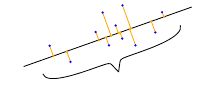

Fig.4 PCA finds a lower-dimensional subspace (line) that maintains as much variance (spread of the data) as possible when the data (blue) is projected onto this subspace (orange).

## 10.2 Maximum Variance Perspective

In Section 10.1, we discussed how a two-dimensional dataset can be compressed into a single coordinate, as illustrated in Figure 10.1. Figure 10.1(b) showed that ignoring the $x_2$-coordinate resulted in compressed data that remained similar to the original data in Figure 10.1(a), preserving much of the information. However, ignoring the $x_1$-coordinate would have led to compressed data that was very dissimilar, losing significant information. If we interpret the information content of the data as how "space-filling" the dataset is, we can measure this by the spread of the data. From Section 6.4.1, we know that variance indicates the spread of the data. Thus, we can derive Principal Component Analysis (PCA) as a dimensionality reduction algorithm that maximizes the variance in the low-dimensional representation to retain as much information as possible. Figure 10.4 illustrates this concept, showing PCA finding a lower-dimensional subspace (a line) that maintains the maximum variance when the data (blue) is projected onto this subspace (orange).

### Problem Setup

Consider the setting from Section 10.1, where our goal is to find a matrix $B$ (see Equation (10.3)) that retains as much information as possible when compressing data by projecting it onto the subspace spanned by the columns $b_1, \ldots, b_M$ of $B$. Retaining the most information after compression is equivalent to capturing the largest amount of variance in the low-dimensional code (Hotelling, 1933).

#### Remark: Centered Data

For the data covariance matrix defined in Equation (10.1), we assume the data is centered (mean zero). This assumption is made without loss of generality. Let $\mu$ be the mean of the data. Using the properties of variance from Section 6.4.4, we have:

$$
\mathbb{V}_z[z] = \mathbb{V}_x[B^\top (x - \mu)] = \mathbb{V}_x[B^\top x - B^\top \mu] = \mathbb{V}_x[B^\top x], \tag{10.6}
$$

i.e., the variance of the low-dimensional code does not depend on the mean of the data. Therefore, we assume without loss of generality that the data has mean 0 for the remainder of this section. With this assumption, the mean of the low-dimensional code is also 0, since:

$$
\mathbb{E}_z[z] = \mathbb{E}_x[B^\top x] = B^\top \mathbb{E}_x[x] = 0.
$$

### 10.2.1 Direction with Maximal Variance

We maximize the variance of the low-dimensional code using a sequential approach, starting with a single vector $b_1 \in \mathbb{R}^D$ that maximizes the variance of the projected data. The vector $b_1$ will be the first column of the matrix $B$ and thus the first of $M$ orthonormal basis vectors that span the lower-dimensional subspace.

Our aim is to maximize the variance of the first coordinate $z_1$ of the low-dimensional representation $z \in \mathbb{R}^M$. Given $N$ i.i.d. data points, the variance is:

$$
V_1 := \mathbb{V}[z_1] = \frac{1}{N} \sum_{n=1}^N z_{1n}^2, \tag{10.7}
$$

where $z_{1n}$ is the first coordinate of the low-dimensional representation $z_n \in \mathbb{R}^M$ of the data point $x_n \in \mathbb{R}^D$. The first component of $z_n$ is given by the orthogonal projection of $x_n$ onto the one-dimensional subspace spanned by $b_1$ (Section 3.8):

$$
z_{1n} = b_1^\top x_n. \tag{10.8}
$$

Substituting Equation (10.8) into (10.7), we obtain:

$$
V_1 = \frac{1}{N} \sum_{n=1}^N (b_1^\top x_n)^2 = \frac{1}{N} \sum_{n=1}^N b_1^\top x_n x_n^\top b_1, \tag{10.9a}
$$

$$
V_1 = b_1^\top \left( \frac{1}{N} \sum_{n=1}^N x_n x_n^\top \right) b_1 = b_1^\top S b_1, \tag{10.9b}
$$

where $S$ is the data covariance matrix defined in Equation (10.1). In Equation (10.9a), we used the symmetry of the dot product: $b_1^\top x_n = x_n^\top b_1$.

Notice that arbitrarily increasing the magnitude of $b_1$ increases $V_1$, since a vector $b_1$ that is twice as long can make $V_1$ four times larger (due to the quadratic form). To prevent this, we restrict $b_1$ to be a unit vector, i.e., $\lVert b_1 \rVert_2 = 1$, which is equivalent to:

$$
\lVert b_1 \rVert^2 = 1 \quad \Leftrightarrow \quad \lVert b_1 \rVert = 1.
$$

This constraint leads to a *constrained optimization problem* where we seek the direction along which the data varies the most:

$$
\max_{b_1} b_1^\top S b_1 \quad \text{subject to} \quad \lVert b_1 \rVert^2 = 1. \tag{10.10}
$$

Following Section 7.2, we solve this using the Lagrangian:

$$
\mathcal{L}(b_1, \lambda_1) = b_1^\top S b_1 + \lambda_1 (1 - b_1^\top b_1). \tag{10.11}
$$

The partial derivatives of the Lagrangian with respect to $b_1$ and $\lambda_1$ are:

$$
\frac{\partial \mathcal{L}}{\partial b_1} = 2 S b_1 - 2 \lambda_1 b_1, \quad \frac{\partial \mathcal{L}}{\partial \lambda_1} = 1 - b_1^\top b_1. \tag{10.12}
$$

Setting these derivatives to zero gives:

$$
S b_1 = \lambda_1 b_1, \tag{10.13}
$$

$$
b_1^\top b_1 = 1. \tag{10.14}
$$

From Equation (10.13) and the definition of eigenvalue decomposition (Section 4.4), we see that $b_1$ is an eigenvector of the data covariance matrix $S$, and $\lambda_1$ is the corresponding eigenvalue. Using this eigenvector property, we can rewrite the variance objective (Equation 10.10) as:

$$
V_1 = b_1^\top S b_1 = \lambda_1 b_1^\top b_1 = \lambda_1, \tag{10.15}
$$

since $b_1^\top b_1 = 1$. Thus, the variance of the data projected onto the one-dimensional subspace equals the eigenvalue associated with the basis vector $b_1$. To maximize the variance, we choose $b_1$ to be the eigenvector corresponding to the largest eigenvalue of $S$. This eigenvector is called the *first principal component*.

To understand the contribution of the principal component $b_1$ in the original data space, we map the coordinate $z_{1n}$ back to the data space:

$$
\tilde{x}_n = b_1 z_{1n} = b_1 (b_1^\top x_n) \in \mathbb{R}^D. \tag{10.16}
$$

#### Remark

Although $\tilde{x}_n$ is a $D$-dimensional vector, it only requires a single coordinate $z_{1n}$ to represent it with respect to the basis vector $b_1 \in \mathbb{R}^D$. $\diamond$


Original Data: [[1.0, 2.0], [2.0, 1.5], [3.0, 3.0], [4.0, 3.5], [5.0, 4.0]]
Mean: [3.0, 2.8]
Centered Data: [[-2.0, -0.7999999999999998], [-1.0, -1.2999999999999998], [0.0, 0.20000000000000018], [1.0, 0.7000000000000002], [2.0, 1.2000000000000002]]

Covariance Matrix S:
[2.0, 1.2]
[1.2, 0.8600000000000001]

Eigenvalues: λ1 = 2.758, λ2 = 0.102
First Principal Component (b1): [0.8452978216487629, 0.534295417082962]
Variance along b1 (should equal λ1): 2.758

Projected Coordinates (z_1n): ['-2.118', '-1.540', '0.107', '1.219', '2.332']
Reconstructed Data (x̃_n): [[-1.7903678163100034, -1.131654778526975], [-1.3016587851144321, -0.8227518227077582], [0.09032775043542908, 0.057094318543171325], [1.0306755338081452, 0.6514688670782445], [1.9710233171808618, 1.2458434156133178]]
PCA Demonstration with Matplotlib Plotting
=== PCA Maximum Variance Demonstration ===
Section 10.2: Maximum Variance Perspective

Verifying Variance of Projected Data:
Computed Variance V1: 2.758
Expected Variance (λ1

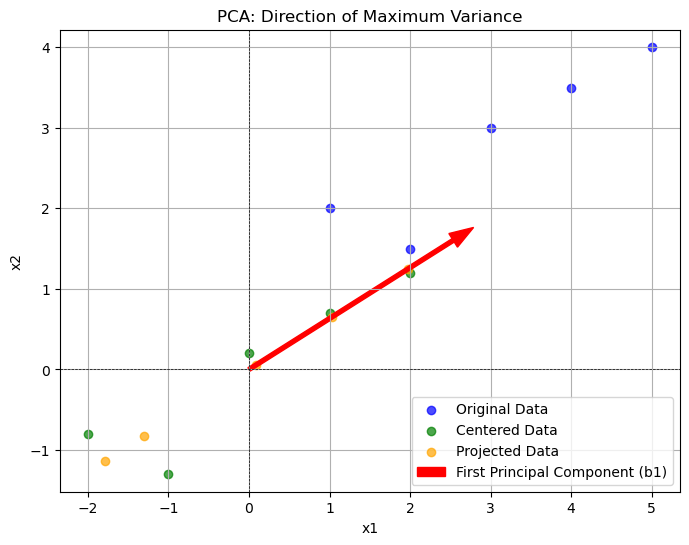


Summary of Results and Visualizations:
• First Principal Component (b1): [0.8452978216487629, 0.534295417082962]
• Variance along b1: 2.758
• Plotted original, centered, and projected data with the direction of b1


In [3]:
import math
import matplotlib.pyplot as plt

# --- Define the Dataset ---
# 2D dataset (D = 2) with N = 5 points
data = [
    [1.0, 2.0],
    [2.0, 1.5],
    [3.0, 3.0],
    [4.0, 3.5],
    [5.0, 4.0]
]
N = len(data)
D = len(data[0])

# --- Center the Data ---
def compute_mean(data):
    """Compute the mean of the data across each dimension."""
    mean = [0.0] * D
    for x in data:
        for i in range(D):
            mean[i] += x[i] / N
    return mean

def center_data(data, mean):
    """Center the data by subtracting the mean."""
    centered_data = []
    for x in data:
        centered_x = [x[i] - mean[i] for i in range(D)]
        centered_data.append(centered_x)
    return centered_data

mean = compute_mean(data)
centered_data = center_data(data, mean)
print("Original Data:", data)
print("Mean:", mean)
print("Centered Data:", centered_data)

# --- Compute the Covariance Matrix S ---
def compute_covariance_matrix(data):
    """Compute the data covariance matrix S (Equation 10.1)."""
    S = [[0.0 for _ in range(D)] for _ in range(D)]
    for x in data:
        for i in range(D):
            for j in range(D):
                S[i][j] += (x[i] * x[j]) / N
    return S

S = compute_covariance_matrix(centered_data)
print("\nCovariance Matrix S:")
for row in S:
    print(row)

# --- Eigenvalue Decomposition (Manual for 2x2 Matrix) ---
def compute_eigenvalues_2x2(S):
    """Compute eigenvalues of a 2x2 matrix using the characteristic equation."""
    a, b = S[0][0], S[0][1]
    c, d = S[1][0], S[1][1]
    # Characteristic equation: det(S - λI) = 0 => λ² - (a+d)λ + (ad - bc) = 0
    trace = a + d
    det = a * d - b * c
    discriminant = trace**2 - 4 * det
    if discriminant < 0:
        raise ValueError("Complex eigenvalues not handled.")
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (trace + sqrt_disc) / 2
    lambda2 = (trace - sqrt_disc) / 2
    return max(lambda1, lambda2), min(lambda1, lambda2)

def compute_eigenvector_2x2(S, eigenvalue):
    """Compute the eigenvector for a given eigenvalue (normalized)."""
    a, b = S[0][0], S[0][1]
    c, d = S[1][0], S[1][1]
    # Solve (S - λI)v = 0
    # For 2x2, use one equation: (a-λ)v1 + b v2 = 0 => v1 = -b v2 / (a-λ)
    # Choose v2 = 1 for simplicity, then normalize
    if abs(a - eigenvalue) > 1e-10:  # Avoid division by zero
        v1 = -b / (a - eigenvalue)
        v2 = 1.0
    else:
        v1 = 1.0
        v2 = -(d - eigenvalue) / c if abs(c) > 1e-10 else 0.0
    # Normalize to unit vector
    norm = math.sqrt(v1**2 + v2**2)
    return [v1 / norm, v2 / norm]

# Compute eigenvalues and the eigenvector for the largest eigenvalue
lambda1, lambda2 = compute_eigenvalues_2x2(S)
b1 = compute_eigenvector_2x2(S, lambda1)
print(f"\nEigenvalues: λ1 = {lambda1:.3f}, λ2 = {lambda2:.3f}")
print(f"First Principal Component (b1): {b1}")
print(f"Variance along b1 (should equal λ1): {lambda1:.3f}")

# --- Project Data onto b1 ---
def project_data(data, b1):
    """Project data onto b1 to get z_1n (Equation 10.8)."""
    z1 = []
    for x in data:
        # Dot product: z_1n = b1^T x_n
        dot = sum(b1[i] * x[i] for i in range(D))
        z1.append(dot)
    return z1

def reconstruct_data(z1, b1):
    """Reconstruct data in original space: x̃_n = b1 z_1n (Equation 10.16)."""
    reconstructed = []
    for z in z1:
        x_tilde = [z * b1[i] for i in range(D)]
        reconstructed.append(x_tilde)
    return reconstructed

z1 = project_data(centered_data, b1)
reconstructed_data = reconstruct_data(z1, b1)
print("\nProjected Coordinates (z_1n):", [f"{z:.3f}" for z in z1])
print("Reconstructed Data (x̃_n):", reconstructed_data)

# --- Main Demonstration ---
def demonstrate_pca():
    """Demonstrate PCA by maximizing variance (Section 10.2)."""
    print("=== PCA Maximum Variance Demonstration ===")
    print("Section 10.2: Maximum Variance Perspective\n")
    
    # Verify variance (Equation 10.15)
    print("Verifying Variance of Projected Data:")
    V1_computed = sum(z**2 for z in z1) / N
    print(f"Computed Variance V1: {V1_computed:.3f}")
    print(f"Expected Variance (λ1): {lambda1:.3f}")
    print(f"Error: {abs(V1_computed - lambda1):.3f}")

# --- Plotting Function ---
def plot_pca(data, centered_data, b1, reconstructed_data):
    """Plot the original data, centered data, and the first principal component."""
    plt.figure(figsize=(8, 6))
    
    # Plot original data
    orig_x = [x[0] for x in data]
    orig_y = [x[1] for x in data]
    plt.scatter(orig_x, orig_y, color='blue', label='Original Data', alpha=0.7)
    
    # Plot centered data
    cent_x = [x[0] for x in centered_data]
    cent_y = [x[1] for x in centered_data]
    plt.scatter(cent_x, cent_y, color='green', label='Centered Data', alpha=0.7)
    
    # Plot reconstructed data (projections)
    recon_x = [x[0] for x in reconstructed_data]
    recon_y = [x[1] for x in reconstructed_data]
    plt.scatter(recon_x, recon_y, color='orange', label='Projected Data', alpha=0.7)
    
    # Plot the direction of b1 (first principal component)
    scale = 3  # Scale for visibility
    plt.arrow(0, 0, scale * b1[0], scale * b1[1], color='red', width=0.05,
              head_width=0.2, label='First Principal Component (b1)')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('PCA: Direction of Maximum Variance')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Equal scaling for better visualization
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("PCA Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate PCA
    demonstrate_pca()

    # Plot the results
    print("\nPlotting PCA Results")
    plot_pca(data, centered_data, b1, reconstructed_data)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• First Principal Component (b1): {b1}")
    print(f"• Variance along b1: {lambda1:.3f}")
    print("• Plotted original, centered, and projected data with the direction of b1")

## 10.2.2 M-dimensional Subspace with Maximal Variance

Assume we have found the first $m-1$ principal components as the $m-1$ eigenvectors of the data covariance matrix $S$ corresponding to the largest $m-1$ eigenvalues. Since $S$ is symmetric, the spectral theorem (Theorem 4.15) guarantees that these eigenvectors form an orthonormal eigenbasis of an $(m-1)$-dimensional subspace of $\mathbb{R}^D$. To find the $m$-th principal component, we aim to capture the remaining information by subtracting the effect of the first $m-1$ principal components $b_1, \ldots, b_{m-1}$ from the data.

We define the new data matrix $\hat{X}$ as:

$$
\hat{X} := X - \sum_{i=1}^{m-1} b_i b_i^\top X = X - B_{m-1} X, \tag{10.17}
$$

where $X = [x_1, \ldots, x_N] \in \mathbb{R}^{D \times N}$ contains the data points as column vectors, and $B_{m-1} := \sum_{i=1}^{m-1} b_i b_i^\top$ is a projection matrix that projects onto the subspace spanned by $b_1, \ldots, b_{m-1}$. The matrix $\hat{X} := [\hat{x}_1, \ldots, \hat{x}_N] \in \mathbb{R}^{D \times N}$ contains the information in the data that has not yet been compressed.

#### Remark: Notation

Throughout this chapter, we deviate from the convention of collecting data $x_1, \ldots, x_N$ as rows of the data matrix. Instead, we define them as the columns of $X$, making $X$ a $D \times N$ matrix rather than the conventional $N \times D$ matrix. This choice simplifies the algebraic operations, avoiding the need to transpose the matrix or redefine vectors as row vectors that are left-multiplied onto matrices. $\diamond$

### Finding the $m$-th Principal Component

To find the $m$-th principal component, we maximize the variance of the $m$-th coordinate $z_m$ of the low-dimensional representation:

$$
V_m = \mathbb{V}[z_m] = \frac{1}{N} \sum_{n=1}^N z_{mn}^2 = \frac{1}{N} \sum_{n=1}^N (b_m^\top \hat{x}_n)^2 = b_m^\top \hat{S} b_m, \tag{10.18}
$$

subject to the constraint $\lVert b_m \rVert^2 = 1$. Here, we followed the same steps as in Equation (10.9b), and $\hat{S}$ is defined as the data covariance matrix of the transformed dataset $\hat{X} := \{\hat{x}_1, \ldots, \hat{x}_N\}$.

As in the case of the first principal component, we solve this constrained optimization problem and find that the optimal solution $b_m$ is the eigenvector of $\hat{S}$ associated with the largest eigenvalue of $\hat{S}$. Interestingly, $b_m$ is also an eigenvector of the original covariance matrix $S$. More generally, the sets of eigenvectors of $S$ and $\hat{S}$ are identical.

### Eigenvector Relationship Between $S$ and $\hat{S}$

Since both $S$ and $\hat{S}$ are symmetric, the spectral theorem (Theorem 4.15) ensures that we can find an orthonormal basis (ONB) of $D$ distinct eigenvectors for both $S$ and $\hat{S}$. Let’s show that every eigenvector of $S$ is also an eigenvector of $\hat{S}$. Assume we have found eigenvectors $b_1, \ldots, b_{m-1}$ of $S$. Consider an eigenvector $b_i$ of $S$, i.e., $S b_i = \lambda_i b_i$. We compute:

$$
\hat{S} b_i = \frac{1}{N} \hat{X} \hat{X}^\top b_i = \frac{1}{N} (X - B_{m-1} X)(X - B_{m-1} X)^\top b_i, \tag{10.19a}
$$

$$
\hat{S} b_i = \left( S - S B_{m-1} - B_{m-1} S + B_{m-1} S B_{m-1} \right) b_i. \tag{10.19b}
$$

We distinguish two cases based on the index $i$ relative to $m$:

- **Case 1: $i \geq m$** (i.e., $b_i$ is not among the first $m-1$ principal components). Since $b_i$ is orthogonal to $b_1, \ldots, b_{m-1}$ (due to the ONB property), we have $B_{m-1} b_i = 0$.
- **Case 2: $i < m$** (i.e., $b_i$ is among the first $m-1$ principal components). Since $b_1, \ldots, b_{m-1}$ form an ONB of the principal subspace, $B_{m-1} b_i = b_i$.

These cases are summarized as:

$$
B_{m-1} b_i = 
\begin{cases} 
b_i & \text{if } i < m, \\
0 & \text{if } i \geq m.
\end{cases} \tag{10.20}
$$

#### Case $i \geq m$

Using Equation (10.20) in (10.19b), we get:

$$
\hat{S} b_i = (S - B_{m-1} S) b_i = S b_i = \lambda_i b_i,
$$

since $B_{m-1} b_i = 0$. Specifically, for $i = m$:

$$
\hat{S} b_m = S b_m = \lambda_m b_m. \tag{10.21}
$$

This shows that $b_m$ is an eigenvector of both $S$ and $\hat{S}$, with eigenvalue $\lambda_m$. Here, $\lambda_m$ is the largest eigenvalue of $\hat{S}$ and the $m$-th largest eigenvalue of $S$, with the associated eigenvector $b_m$.

#### Case $i < m$

Using Equation (10.20) in (10.19b), we get:

$$
\hat{S} b_i = \left( S - S B_{m-1} - B_{m-1} S + B_{m-1} S B_{m-1} \right) b_i = 0 = 0 b_i, \tag{10.22}
$$

since $B_{m-1} b_i = b_i$. This means that $b_1, \ldots, b_{m-1}$ are eigenvectors of $\hat{S}$ with eigenvalue 0, so they span the null space of $\hat{S}$.

Overall, every eigenvector of $S$ is an eigenvector of $\hat{S}$. However, if the eigenvector of $S$ is part of the $(m-1)$-dimensional principal subspace, its associated eigenvalue in $\hat{S}$ is 0.

### Variance in the $M$-dimensional Subspace

Using Equation (10.21) and the constraint $b_m^\top b_m = 1$, the variance of the data projected onto the $m$-th principal component is:

$$
V_m = b_m^\top S b_m = \lambda_m b_m^\top b_m = \lambda_m. \tag{10.23}
$$

This derivation shows an intimate connection between the $M$-dimensional subspace with maximal variance and the eigenvalue decomposition. The variance of the data, when projected onto an $M$-dimensional subspace, equals the sum of the eigenvalues associated with the corresponding eigenvectors of the data covariance matrix. We will revisit this connection in Section 10.4.

### Example 2: Eigenvalues of MNIST "8"

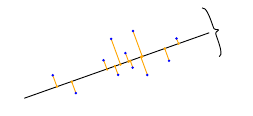

Fig.6 Illustration of the projection approach: Find a subspace (line) that minimizes the length of the difference vector between projected (orange) and original (blue) data.

Fig.5 illustrates the properties of the 500 training data samples of the digit "8" from the MNIST dataset:

- **(a)** Eigenvalues of the data covariance matrix of all digits "8", sorted in descending order.
- **(b)** Variance captured by the principal components associated with the largest eigenvalues.

This example highlights how the eigenvalues decrease rapidly, indicating that a small number of principal components can capture most of the variance in the data.

Original Data: [[1.0, 2.0], [2.0, 1.5], [3.0, 3.0], [4.0, 3.5], [5.0, 4.0]]
Mean: [3.0, 2.8]
Centered Data (X): [[-2.0, -0.7999999999999998], [-1.0, -1.2999999999999998], [0.0, 0.20000000000000018], [1.0, 0.7000000000000002], [2.0, 1.2000000000000002]]

Covariance Matrix S:
[2.0, 1.2]
[1.2, 0.8600000000000001]

Eigenvalues: λ1 = 2.758, λ2 = 0.102
Principal Component b1: [0.8452978216487629, 0.534295417082962]
Principal Component b2: [-0.5342954170829619, 0.845297821648763]
PCA M-dimensional Subspace Demonstration with Matplotlib Plotting
=== PCA M-dimensional Subspace Demonstration ===
Section 10.2.2: M-dimensional Subspace with Maximal Variance


--- Finding the 1-th Principal Component ---
X̂ after removing first 0 components: [[-2.0, -0.7999999999999998], [-1.0, -1.2999999999999998], [0.0, 0.20000000000000018], [1.0, 0.7000000000000002], [2.0, 1.2000000000000002]]
Covariance Matrix Ŝ:
[2.0, 1.2]
[1.2, 0.8600000000000001]
Principal Component b1: [0.8452978216487629, 0.53429541708296

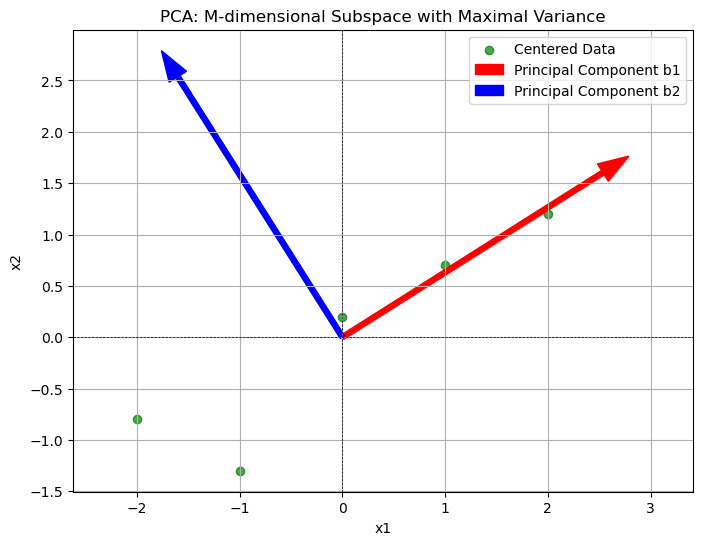


Summary of Results and Visualizations:
• Principal Components: [[0.8452978216487629, 0.534295417082962], [-0.5342954170829619, 0.845297821648763]]
• Total Variance in 2-dimensional Subspace: 2.860
• Plotted centered data with the directions of the principal components


In [4]:
import math
import matplotlib.pyplot as plt

# --- Define the Dataset ---
# 2D dataset (D = 2) with N = 5 points (same as previous for continuity)
data = [
    [1.0, 2.0],
    [2.0, 1.5],
    [3.0, 3.0],
    [4.0, 3.5],
    [5.0, 4.0]
]
N = len(data)
D = len(data[0])
M = D  # We will compute all principal components (M = D = 2)

# --- Center the Data ---
def compute_mean(data):
    """Compute the mean of the data across each dimension."""
    mean = [0.0] * D
    for x in data:
        for i in range(D):
            mean[i] += x[i] / N
    return mean

def center_data(data, mean):
    """Center the data by subtracting the mean."""
    centered_data = []
    for x in data:
        centered_x = [x[i] - mean[i] for i in range(D)]
        centered_data.append(centered_x)
    return centered_data

mean = compute_mean(data)
X = center_data(data, mean)  # X as a list of column vectors [x_1, ..., x_N]
print("Original Data:", data)
print("Mean:", mean)
print("Centered Data (X):", X)

# --- Compute the Covariance Matrix S ---
def compute_covariance_matrix(data):
    """Compute the data covariance matrix S = (1/N) X X^T."""
    S = [[0.0 for _ in range(D)] for _ in range(D)]
    for x in data:
        for i in range(D):
            for j in range(D):
                S[i][j] += (x[i] * x[j]) / N
    return S

S = compute_covariance_matrix(X)
print("\nCovariance Matrix S:")
for row in S:
    print(row)

# --- Eigenvalue Decomposition (Manual for 2x2 Matrix) ---
def compute_eigenvalues_2x2(S):
    """Compute eigenvalues of a 2x2 matrix using the characteristic equation."""
    a, b = S[0][0], S[0][1]
    c, d = S[1][0], S[1][1]
    trace = a + d
    det = a * d - b * c
    discriminant = trace**2 - 4 * det
    if discriminant < 0:
        raise ValueError("Complex eigenvalues not handled.")
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (trace + sqrt_disc) / 2
    lambda2 = (trace - sqrt_disc) / 2
    return lambda1, lambda2  # Returns in descending order

def compute_eigenvector_2x2(S, eigenvalue):
    """Compute the eigenvector for a given eigenvalue (normalized)."""
    a, b = S[0][0], S[0][1]
    c, d = S[1][0], S[1][1]
    if abs(a - eigenvalue) > 1e-10:
        v1 = -b / (a - eigenvalue)
        v2 = 1.0
    else:
        v1 = 1.0
        v2 = -(d - eigenvalue) / c if abs(c) > 1e-10 else 0.0
    norm = math.sqrt(v1**2 + v2**2)
    return [v1 / norm, v2 / norm]

# Compute all eigenvalues and eigenvectors
eigenvalues = compute_eigenvalues_2x2(S)
b1 = compute_eigenvector_2x2(S, eigenvalues[0])
b2 = compute_eigenvector_2x2(S, eigenvalues[1])
principal_components = [b1, b2]
print(f"\nEigenvalues: λ1 = {eigenvalues[0]:.3f}, λ2 = {eigenvalues[1]:.3f}")
print(f"Principal Component b1: {b1}")
print(f"Principal Component b2: {b2}")

# --- Compute X̂ for m-th Principal Component (Equation 10.17) ---
def compute_projection_matrix(B_m_minus_1):
    """Compute B_{m-1} = sum_{i=1}^{m-1} b_i b_i^T."""
    B = [[0.0 for _ in range(D)] for _ in range(D)]
    for b in B_m_minus_1:
        for i in range(D):
            for j in range(D):
                B[i][j] += b[i] * b[j]
    return B

def matrix_vector_multiply(matrix, vector):
    """Multiply a DxD matrix by a D-dimensional vector."""
    result = [0.0] * D
    for i in range(D):
        for j in range(D):
            result[i] += matrix[i][j] * vector[j]
    return result

def compute_X_hat(X, B_m_minus_1):
    """Compute X̂ = X - B_{m-1} X (Equation 10.17)."""
    B = compute_projection_matrix(B_m_minus_1)
    X_hat = []
    for n in range(N):
        Bx = matrix_vector_multiply(B, X[n])
        x_hat = [X[n][i] - Bx[i] for i in range(D)]
        X_hat.append(x_hat)
    return X_hat

# --- Compute Variance for m-th Component (Equation 10.18 and 10.23) ---
def compute_S_hat(X_hat):
    """Compute the covariance matrix Ŝ of X̂."""
    return compute_covariance_matrix(X_hat)

def compute_variance_along_bm(X, bm):
    """Compute variance V_m = b_m^T S b_m (Equation 10.23)."""
    S = compute_covariance_matrix(X)
    result = 0.0
    for i in range(D):
        temp = 0.0
        for j in range(D):
            temp += S[i][j] * bm[j]
        result += bm[i] * temp
    return result

# --- Main Demonstration ---
def demonstrate_pca_m_dimensional(M):
    """Demonstrate PCA for an M-dimensional subspace (Section 10.2.2)."""
    print("=== PCA M-dimensional Subspace Demonstration ===")
    print("Section 10.2.2: M-dimensional Subspace with Maximal Variance\n")
    
    total_variance = 0.0
    for m in range(1, M + 1):
        print(f"\n--- Finding the {m}-th Principal Component ---")
        # Compute X̂ after removing the effect of the first m-1 components
        B_m_minus_1 = principal_components[:m-1]
        X_hat = compute_X_hat(X, B_m_minus_1)
        print(f"X̂ after removing first {m-1} components:", X_hat)
        
        # Compute Ŝ
        S_hat = compute_S_hat(X_hat)
        print(f"Covariance Matrix Ŝ:")
        for row in S_hat:
            print(row)
        
        # The m-th principal component is b_m
        bm = principal_components[m-1]
        print(f"Principal Component b{m}: {bm}")
        
        # Compute variance V_m (should equal λ_m)
        V_m = compute_variance_along_bm(X, bm)
        lambda_m = eigenvalues[m-1]
        print(f"Variance V_{m} = {V_m:.3f}")
        print(f"Expected Variance (λ_{m}) = {lambda_m:.3f}")
        print(f"Error: {abs(V_m - lambda_m):.3f}")
        
        total_variance += V_m
    
    print(f"\nTotal Variance in {M}-dimensional Subspace: {total_variance:.3f}")
    print(f"Sum of Eigenvalues: {sum(eigenvalues):.3f}")

# --- Plotting Function ---
def plot_pca_m_dimensional(X, principal_components):
    """Plot the centered data and the principal components."""
    plt.figure(figsize=(8, 6))
    
    # Plot centered data
    cent_x = [x[0] for x in X]
    cent_y = [x[1] for x in X]
    plt.scatter(cent_x, cent_y, color='green', label='Centered Data', alpha=0.7)
    
    # Plot principal components
    colors = ['red', 'blue']
    scale = 3  # Scale for visibility
    for i, b in enumerate(principal_components, 1):
        plt.arrow(0, 0, scale * b[0], scale * b[1], color=colors[i-1], width=0.05,
                  head_width=0.2, label=f'Principal Component b{i}')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('PCA: M-dimensional Subspace with Maximal Variance')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("PCA M-dimensional Subspace Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate PCA for M-dimensional subspace
    demonstrate_pca_m_dimensional(M)

    # Plot the results
    print("\nPlotting PCA Results")
    plot_pca_m_dimensional(X, principal_components)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Principal Components: {principal_components}")
    print(f"• Total Variance in {M}-dimensional Subspace: {sum(eigenvalues):.3f}")
    print("• Plotted centered data with the directions of the principal components")

## 10.3 Projection Perspective

In Section 10.2, we derived PCA by maximizing the variance in the projected space to retain as much information as possible. In this section, we derive PCA from a different perspective: minimizing the average reconstruction error. This approach allows us to interpret PCA as implementing an optimal linear auto-encoder, drawing heavily from concepts in Chapters 2 and 3.

The key idea is to minimize the difference between the original data points $x_n$ and their reconstructions $\tilde{x}_n$, ensuring that $x_n$ and $\tilde{x}_n$ are as close as possible. Figure 10.6 illustrates this setting, while Figure 10.7 provides a simplified example:

- **(a)** A vector $x \in \mathbb{R}^2$ (red cross) is to be projected onto a one-dimensional subspace $U \subseteq \mathbb{R}^2$ spanned by a basis vector $b$.
- **(b)** Shows the difference vectors $x - \tilde{x}_i$ (red lines) between $x$ and various candidate reconstructions $\tilde{x}_i$ for 50 different projections.

### 10.3.1 Setting and Objective

Assume an ordered orthonormal basis (ONB) $B = (b_1, \ldots, b_D)$ of $\mathbb{R}^D$, where $b_i^\top b_j = 1$ if and only if $i = j$, and 0 otherwise. From Section 2.5, we know that any vector $x \in \mathbb{R}^D$ can be expressed as a linear combination of these basis vectors:

$$
x = \sum_{d=1}^D \zeta_d b_d = \sum_{m=1}^M \zeta_m b_m + \sum_{j=M+1}^D \zeta_j b_j, \tag{10.26}
$$

for suitable coordinates $\zeta_d \in \mathbb{R}$. Here, the first $M$ basis vectors span a lower-dimensional subspace $U \subseteq \mathbb{R}^D$ with $\text{dim}(U) = M$, while the remaining basis vectors span the orthogonal complement.

We are interested in finding vectors $\tilde{x} \in \mathbb{R}^D$ that lie in this lower-dimensional subspace $U$:

$$
\tilde{x} = \sum_{m=1}^M z_m b_m \in U \subseteq \mathbb{R}^D, \tag{10.27}
$$

such that $\tilde{x}$ is as similar to $x$ as possible. For example, if $U$ is a plane in $\mathbb{R}^3$ (so $M = 2$, $D = 3$), the vectors in $U$ have dimensionality 2 but are still represented with three coordinates in the standard basis of $\mathbb{R}^3$. At this stage, we note that the coordinates $z_m$ of $\tilde{x}$ are not necessarily the same as the coordinates $\zeta_m$ of $x$.

Our goal is to find optimal coordinates $z_m$ and basis vectors $b_1, \ldots, b_M$ such that the Euclidean distance $\lVert x - \tilde{x} \rVert$ is minimized. Without loss of generality, we assume the dataset $X = \{x_1, \ldots, x_N\}$, $x_n \in \mathbb{R}^D$, is centered at 0, i.e., $\mathbb{E}[X] = 0$. This assumption simplifies the notation, and the solution remains the same even without it, though the expressions would be more complex.

### Objective: Minimize Reconstruction Error

We aim to find the best linear projection of $X$ onto the lower-dimensional subspace $U$ with $\text{dim}(U) = M$, spanned by orthonormal basis vectors $b_1, \ldots, b_M$, which we call the *principal subspace*. The projections of the data points are denoted by:

$$
\tilde{x}_n := \sum_{m=1}^M z_{mn} b_m = B z_n \in \mathbb{R}^D, \tag{10.28}
$$

where $z_n := [z_{1n}, \ldots, z_{Mn}]^\top \in \mathbb{R}^M$ is the coordinate vector of $\tilde{x}_n$ with respect to the basis $(b_1, \ldots, b_M)$, and $B = [b_1, \ldots, b_M]$ is the matrix whose columns are the basis vectors.

Our objective is to make $\tilde{x}_n$ as similar to $x_n$ as possible, using the squared Euclidean distance (Euclidean norm) $\lVert x - \tilde{x} \rVert^2$ as the similarity measure. We define the *reconstruction error* (Pearson, 1901) as the average squared Euclidean distance over the dataset:

$$
J_M := \frac{1}{N} \sum_{n=1}^N \lVert x_n - \tilde{x}_n \rVert^2, \tag{10.29}
$$

where the subscript $M$ indicates the dimension of the subspace onto which we project the data.

To minimize this reconstruction error, we need to find both the orthonormal basis $(b_1, \ldots, b_M)$ of the principal subspace and the coordinates $z_n \in \mathbb{R}^M$ of the projections. We adopt a two-step approach:
1. Optimize the coordinates $z_n$ for a given ONB $(b_1, \ldots, b_M)$.
2. Find the optimal ONB that further minimizes the reconstruction error.

Original Data: [[1.0, 2.0], [2.0, 1.5], [3.0, 3.0], [4.0, 3.5], [5.0, 4.0]]
Mean: [3.0, 2.8]
Centered Data (X): [[-2.0, -0.7999999999999998], [-1.0, -1.2999999999999998], [0.0, 0.20000000000000018], [1.0, 0.7000000000000002], [2.0, 1.2000000000000002]]

Covariance Matrix S:
[2.0, 1.2]
[1.2, 0.8600000000000001]

Eigenvalues: λ1 = 2.758, λ2 = 0.102
Optimal Basis Vector b1: [0.8452978216487629, 0.534295417082962]

Coordinates z_n in the Subspace:
z_1: [-2.1180319769638953]
z_2: [-1.5398818638566134]
z_3: [0.1068590834165925]
z_4: [1.2193046136068364]
z_5: [2.3317501437970805]

Reconstructed Data (x̃_n):
[-1.7903678163100034, -1.131654778526975]
[-1.3016587851144321, -0.8227518227077582]
[0.09032775043542908, 0.057094318543171325]
[1.0306755338081452, 0.6514688670782445]
[1.9710233171808618, 1.2458434156133178]

Reconstruction Error J_1: 0.102
PCA Projection Perspective Demonstration with Matplotlib Plotting
=== PCA Projection Perspective Demonstration ===
Section 10.3: Projection Perspect

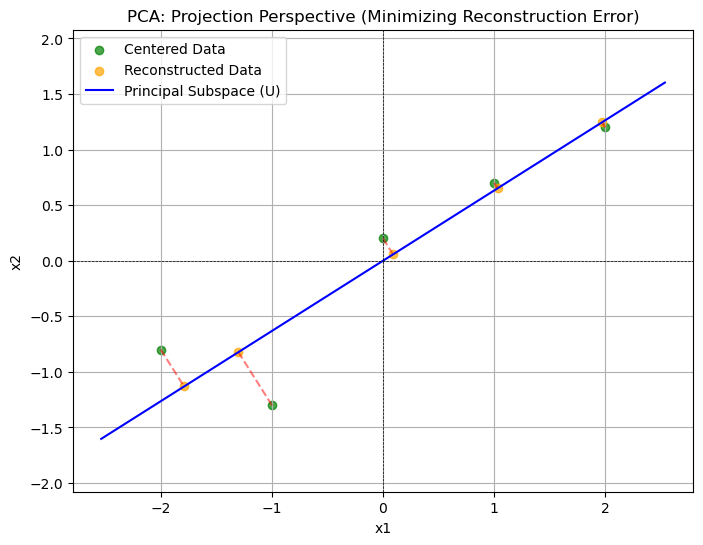


Summary of Results and Visualizations:
• Optimal Basis Vector b1: [0.8452978216487629, 0.534295417082962]
• Reconstruction Error J_1: 0.102
• Plotted centered data, reconstructed data, and the principal subspace


In [5]:
import math
import matplotlib.pyplot as plt

# --- Define the Dataset ---
# 2D dataset (D = 2) with N = 5 points (same as previous for continuity)
data = [
    [1.0, 2.0],
    [2.0, 1.5],
    [3.0, 3.0],
    [4.0, 3.5],
    [5.0, 4.0]
]
N = len(data)
D = len(data[0])
M = 1  # Project onto a 1D subspace

# --- Center the Data ---
def compute_mean(data):
    """Compute the mean of the data across each dimension."""
    mean = [0.0] * D
    for x in data:
        for i in range(D):
            mean[i] += x[i] / N
    return mean

def center_data(data, mean):
    """Center the data by subtracting the mean."""
    centered_data = []
    for x in data:
        centered_x = [x[i] - mean[i] for i in range(D)]
        centered_data.append(centered_x)
    return centered_data

mean = compute_mean(data)
X = center_data(data, mean)
print("Original Data:", data)
print("Mean:", mean)
print("Centered Data (X):", X)

# --- Compute the Covariance Matrix S ---
def compute_covariance_matrix(data):
    """Compute the data covariance matrix S = (1/N) X X^T."""
    S = [[0.0 for _ in range(D)] for _ in range(D)]
    for x in data:
        for i in range(D):
            for j in range(D):
                S[i][j] += (x[i] * x[j]) / N
    return S

S = compute_covariance_matrix(X)
print("\nCovariance Matrix S:")
for row in S:
    print(row)

# --- Eigenvalue Decomposition (Manual for 2x2 Matrix) ---
def compute_eigenvalues_2x2(S):
    """Compute eigenvalues of a 2x2 matrix using the characteristic equation."""
    a, b = S[0][0], S[0][1]
    c, d = S[1][0], S[1][1]
    trace = a + d
    det = a * d - b * c
    discriminant = trace**2 - 4 * det
    if discriminant < 0:
        raise ValueError("Complex eigenvalues not handled.")
    sqrt_disc = math.sqrt(discriminant)
    lambda1 = (trace + sqrt_disc) / 2
    lambda2 = (trace - sqrt_disc) / 2
    return lambda1, lambda2  # Returns in descending order

def compute_eigenvector_2x2(S, eigenvalue):
    """Compute the eigenvector for a given eigenvalue (normalized)."""
    a, b = S[0][0], S[0][1]
    c, d = S[1][0], S[1][1]
    if abs(a - eigenvalue) > 1e-10:
        v1 = -b / (a - eigenvalue)
        v2 = 1.0
    else:
        v1 = 1.0
        v2 = -(d - eigenvalue) / c if abs(c) > 1e-10 else 0.0
    norm = math.sqrt(v1**2 + v2**2)
    return [v1 / norm, v2 / norm]

# Compute the basis vector b1 (first principal component)
eigenvalues = compute_eigenvalues_2x2(S)
b1 = compute_eigenvector_2x2(S, eigenvalues[0])
B = [b1]  # Basis for the M=1 dimensional subspace
print(f"\nEigenvalues: λ1 = {eigenvalues[0]:.3f}, λ2 = {eigenvalues[1]:.3f}")
print(f"Optimal Basis Vector b1: {b1}")

# --- Step 1: Optimize Coordinates z_n for Fixed Basis ---
def compute_coordinates(X, B):
    """Compute z_n = B^T x_n for each data point (Equation 10.28)."""
    Z = []
    for x in X:
        z_n = []
        for b in B:
            # Dot product: z_mn = b_m^T x_n
            z_mn = sum(b[i] * x[i] for i in range(D))
            z_n.append(z_mn)
        Z.append(z_n)
    return Z

Z = compute_coordinates(X, B)
print("\nCoordinates z_n in the Subspace:")
for i, z in enumerate(Z, 1):
    print(f"z_{i}: {z}")

# --- Compute Reconstructions x̃_n ---
def compute_reconstruction(Z, B):
    """Compute x̃_n = B z_n (Equation 10.28)."""
    X_tilde = []
    for z in Z:
        x_tilde = [0.0] * D
        for m in range(len(B)):
            for i in range(D):
                x_tilde[i] += B[m][i] * z[m]
        X_tilde.append(x_tilde)
    return X_tilde

X_tilde = compute_reconstruction(Z, B)
print("\nReconstructed Data (x̃_n):")
for x_tilde in X_tilde:
    print(x_tilde)

# --- Compute Reconstruction Error (Equation 10.29) ---
def compute_reconstruction_error(X, X_tilde):
    """Compute J_M = (1/N) Σ ||x_n - x̃_n||^2 (Equation 10.29)."""
    total_error = 0.0
    for n in range(N):
        squared_norm = sum((X[n][i] - X_tilde[n][i])**2 for i in range(D))
        total_error += squared_norm
    J_M = total_error / N
    return J_M

J_M = compute_reconstruction_error(X, X_tilde)
print(f"\nReconstruction Error J_{M}: {J_M:.3f}")

# --- Main Demonstration ---
def demonstrate_pca_projection():
    """Demonstrate PCA by minimizing reconstruction error (Section 10.3)."""
    print("=== PCA Projection Perspective Demonstration ===")
    print("Section 10.3: Projection Perspective\n")
    
    print(f"Optimal Basis for M={M}-dimensional Subspace: {B}")
    print(f"Reconstruction Error J_{M}: {J_M:.3f}")
    # The remaining variance (in the orthogonal subspace) should equal J_M
    remaining_variance = eigenvalues[1]  # For M=1, this is λ2
    print(f"Remaining Variance (λ_{M+1}): {remaining_variance:.3f}")
    print(f"Error between J_{M} and Remaining Variance: {abs(J_M - remaining_variance):.3f}")

# --- Plotting Function ---
def plot_pca_projection(X, X_tilde, B):
    """Plot the centered data, reconstructed data, and the principal subspace."""
    plt.figure(figsize=(8, 6))
    
    # Plot centered data
    cent_x = [x[0] for x in X]
    cent_y = [x[1] for x in X]
    plt.scatter(cent_x, cent_y, color='green', label='Centered Data', alpha=0.7)
    
    # Plot reconstructed data
    recon_x = [x[0] for x in X_tilde]
    recon_y = [x[1] for x in X_tilde]
    plt.scatter(recon_x, recon_y, color='orange', label='Reconstructed Data', alpha=0.7)
    
    # Plot lines connecting original to reconstructed points
    for n in range(N):
        plt.plot([X[n][0], X_tilde[n][0]], [X[n][1], X_tilde[n][1]], 'r--', alpha=0.5)
    
    # Plot the principal subspace (line spanned by b1)
    scale = 3  # Scale for visibility
    b1 = B[0]
    plt.plot([-scale * b1[0], scale * b1[0]], [-scale * b1[1], scale * b1[1]],
             color='blue', label='Principal Subspace (U)')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('PCA: Projection Perspective (Minimizing Reconstruction Error)')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# --- Main Execution ---
if __name__ == "__main__":
    print("PCA Projection Perspective Demonstration with Matplotlib Plotting")
    print("=" * 60)

    # Demonstrate PCA
    demonstrate_pca_projection()

    # Plot the results
    print("\nPlotting PCA Results")
    plot_pca_projection(X, X_tilde, B)

    print("\n" + "=" * 60)
    print("Summary of Results and Visualizations:")
    print(f"• Optimal Basis Vector b1: {b1}")
    print(f"• Reconstruction Error J_{M}: {J_M:.3f}")
    print("• Plotted centered data, reconstructed data, and the principal subspace")